In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
pd.set_option('max_columns', 55)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

df_ses =sessio <br />
df_bat = battle<br />
df_user =user

In [3]:
df_ses = pd.read_csv('sh_session.csv')
df_bat = pd.read_csv('sh_battles.csv')
df_user = pd.read_csv('sh_user.csv')

C:\Program Files\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print df_bat.shape
print df_ses.shape
print df_user.shape

(397339, 12)
(148724, 40)
(17988, 54)


# Step 1:
Calculate the 2nd day, 7th day and 10th day retention .<br />

**Retention = Percentage of people that downloaded the game on day 1 also who played again on day 2, 7 and day 10.**

Two way retention calculation,<br />
1) using the user id (user_id)<br />
2) using the device id (client_mobile_device_aid)

(Please note that you only have the device id from the 14th of April)

In [5]:
df_ses = df_ses.drop('Unnamed: 0',1)
df_bat = df_bat.drop('Unnamed: 0',1)
df_user = df_user.drop('Unnamed: 0',1)

#dropping misrepresented users
to_drop = [1.0, 2.0]
df_ses = df_ses[~df_ses['user_id'].isin(to_drop)]
df_user = df_user[~df_user['user_id'].isin(to_drop)]

In [6]:
df_bat['datetime']=pd.to_datetime(df_bat['datetime'])
df_ses['datetime']=pd.to_datetime(df_ses['datetime'])

In [7]:
df_ses = pd.merge(df_ses,df_user[['user_id','revenues_2w','funnel_1d']],on='user_id')

In [7]:
df_ses.describe(include='all')

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,user_id,session_id,datetime,platform,version,sample_ratio,ip_ip,ip_country,ip_region,ip_city,ip_lat,ip_lon,ip_timezone,client_mobile_os,client_mobile_device,client_mobile_language,client_mobile_uid,client_mobile_device_aid,game_basic_level,game_basic_cash,game_resources_gold,game_resources_food,game_resources_xp,game_resources_stamina,game_resources_de,game_resources_ev,game_resources_fe,game_resources_friend_points,game_resources_le,game_resources_ne,game_resources_rde,game_resources_re,game_resources_rfe,game_resources_rle,game_resources_rne,game_resources_rwe,game_resources_ssre,game_resources_sre,game_resources_we,revenues_2w,funnel_1d
count,1.507580e+05,1.507580e+05,150758,150758,1.507580e+05,150758.0,150758,150758,150758,150758,150758.000000,150758.000000,150758,150626,150626,150626,150626,143850,150758.000000,150758.000000,1.507580e+05,1.507580e+05,1.507580e+05,150758.000000,150085.000000,150085.000000,150085.000000,150085.000000,150085.000000,150085.000000,150085.000000,150085.000000,150085.000000,150085.00000,150085.000000,150085.000000,150085.000000,150085.000000,150085.000000,9219.000000,117962.000000
unique,NaN,NaN,172,3,NaN,NaN,24808,155,783,1764,NaN,NaN,29,27,1678,56,12795,7487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2015-05-12 00:00:00,android,NaN,NaN,54.150.245.14,JP,Tokyo,Tokyo,NaN,NaN,+09:00,None,None,ja,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5398,120784,NaN,NaN,19168,103113,63600,46615,NaN,NaN,103239,59291,59291,72920,59291,59291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2014-11-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.461368e+18,2.442646e+15,NaN,NaN,1.411272e+13,1.0,NaN,NaN,NaN,NaN,33.328896,107.087673,NaN,NaN,NaN,NaN,NaN,NaN,8.653265,64.962098,1.412660e+05,5.128215e+05,1.211244e+05,16.076639,3.662978,77.240697,4.064224,42.007636,2.658227,2.715248,0.177686,9.109844,0.796589,0.16472,0.164267,0.126588,0.066629,1.116541,2.786927,22.818362,4755.271223
std,1.224742e+18,8.618569e+16,NaN,NaN,3.656996e+14,0.0,NaN,NaN,NaN,NaN,8.218279,56.602044,NaN,NaN,NaN,NaN,NaN,NaN,9.178258,314.826241,1.189071e+07,2.380300e+06,9.175688e+06,13.895362,11.179375,165.731435,14.076108,120.935735,9.746712,9.390817,1.413642,33.813431,7.834494,1.52515,1.439866,1.329139,1.581699,4.527147,9.004344,31.848333,846.517550
min,1.000000e+00,4.210000e+02,NaN,NaN,0.000000e+00,1.0,NaN,NaN,NaN,NaN,-37.850000,-157.858000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,-6.193795e+08,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,3.065823e+18,1.561405e+07,NaN,NaN,1.504132e+09,1.0,NaN,NaN,NaN,NaN,34.233000,113.546000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,13.000000,6.050000e+03,4.200000e+02,2.700000e+02,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cohort Analysis
Cohort analysis is a tool to measure user engagement over time. It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.

Cohort analysis proves to be valuable because it helps to separate growth metrics from engagement metrics as growth can easily mask engagement problems. In reality, the lack of activity of the old users is being hidden by the impressive growth numbers of new users, which results in concealing the lack of engagement from a small number of people.

**Two main benefits of reading the above cohort table, are:**

1)product lifetime (as depicted vertically down in the table) – comparing different cohorts at the same stage in their life cycle – we can see what % of people in a cohort are coming back to app after 3 days and so on. The early lifetime months can be linked to the quality of your onboarding experience and the performance of customer success team.

2)user lifetime (as depicted horizontally to the right of the table) – seeing the long term relationship with people in any cohort – to ascertain how long people are coming back and how strong or how valuable that cohort is. This can be presumably linked to something like the quality of the product, operations, and customer support.

### Creating a period column based on the OrderDate
Since we're doing monthly cohorts, we'll be looking at the total monthly behavior of our users. Therefore, we don't want granular OrderDate data (right now).

<h1 span style="color:#0088FF"> Retention By Month the User Joined:</span>

In [8]:
df_ses['OrderPeriod'] = df_ses.datetime.apply(lambda x: x.strftime('%Y-%m'))
df_ses.head()

,user_id,session_id,datetime,platform,version,sample_ratio,ip_ip,ip_country,ip_region,ip_city,ip_lat,ip_lon,ip_timezone,client_mobile_os,client_mobile_device,client_mobile_language,client_mobile_uid,client_mobile_device_aid,game_basic_level,game_basic_cash,game_resources_gold,game_resources_food,game_resources_xp,game_resources_stamina,game_resources_de,game_resources_ev,game_resources_fe,game_resources_friend_points,game_resources_le,game_resources_ne,game_resources_rde,game_resources_re,game_resources_rfe,game_resources_rle,game_resources_rne,game_resources_rwe,game_resources_ssre,game_resources_sre,game_resources_we,revenues_2w,funnel_1d,OrderPeriod
0,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,1,5,3000.0,140,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11
1,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,2,10005,1002750.0,1000010,275,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11
2,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,3,9926,998400.0,1000070,1075,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11
3,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,7,9371,605526.0,1000120,8675,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11
4,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,7,9371,605526.0,1000120,8675,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11


### Determining the user's cohort group (based on their first order)
Create a new column called CohortGroup, which is the year and month in which the user's first purchase occurred.

In [10]:
df_ses.set_index('user_id', inplace=True)
df_ses['CohortGroup'] = df_ses.groupby(level=0)['datetime'].min().apply(lambda x: x.strftime('%Y-%m'))
df_ses.reset_index(inplace=True)

,user_id,session_id,datetime,platform,version,sample_ratio,ip_ip,ip_country,ip_region,ip_city,ip_lat,ip_lon,ip_timezone,client_mobile_os,client_mobile_device,client_mobile_language,client_mobile_uid,client_mobile_device_aid,game_basic_level,game_basic_cash,game_resources_gold,game_resources_food,game_resources_xp,game_resources_stamina,game_resources_de,game_resources_ev,game_resources_fe,game_resources_friend_points,game_resources_le,game_resources_ne,game_resources_rde,game_resources_re,game_resources_rfe,game_resources_rle,game_resources_rne,game_resources_rwe,game_resources_ssre,game_resources_sre,game_resources_we,revenues_2w,funnel_1d,OrderPeriod,CohortGroup
0,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,1,5,3000.0,140,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11,2014-11
1,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,2,10005,1002750.0,1000010,275,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11,2014-11
2,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,3,9926,998400.0,1000070,1075,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11,2014-11
3,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,7,9371,605526.0,1000120,8675,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11,2014-11
4,3.043009e+18,3.043009e+18,2014-11-26,android,0,1,62.97.102.90,ES,CATALONIA,BARCELONA,41.3888,2.15899,+02:00,NaN,NaN,NaN,NaN,NaN,7,9371,605526.0,1000120,8675,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,2014-11,2014-11


### Rolling up data by CohortGroup & OrderPeriod¶
Since we're looking at monthly cohorts, we need to aggregate users, orders, and amount spent by the CohortGroup within the month (OrderPeriod).

In [11]:
grouped = df_ses.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'user_id': pd.Series.nunique,
                       'session_id': pd.Series.nunique,
                       'funnel_1d': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'user_id': 'TotalUsers',
                        'session_id': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  funnel_1d  TotalOrders
CohortGroup OrderPeriod                                    
2014-11     2014-11            81.0    12963.0         81.0
            2014-12             3.0      699.0          4.0
            2015-01             2.0      466.0          2.0
2014-12     2014-12            43.0    75164.0        223.0
            2015-01             3.0    21203.0         81.0

### Labeling the CohortPeriod for each CohortGroup
We want to look at how each cohort has behaved in the months following their first purchase, so we'll need to index each cohort to their first purchase month. For example, CohortPeriod = 1 will be the cohort's first month, CohortPeriod = 2 is their second, and so on.

This allows us to compare cohorts across various stages of their lifetime.

In [12]:
def cohort_period(df_ses):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd day for every user:
        df_ses.sort(['user_id', 'OrderTime', inplace=True)
        df_ses = df_ses.groupby('user_id').apply(cohort_period)
        df_ses[df_ses.CohortPeriod == 3]
    """
    df_ses['CohortPeriod'] = np.arange(len(df_ses)) + 1
    return df_ses

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  funnel_1d  TotalOrders  CohortPeriod
CohortGroup OrderPeriod                                                  
2014-11     2014-11            81.0    12963.0         81.0             1
            2014-12             3.0      699.0          4.0             2
            2015-01             2.0      466.0          2.0             3
2014-12     2014-12            43.0    75164.0        223.0             1
            2015-01             3.0    21203.0         81.0             2

### User Retention by Cohort Group
We want to look at the percentage change of each CohortGroup over time -- not the absolute change.

To do this, we'll first need to create a pandas Series containing each CohortGroup and its size.

In [13]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2014-11      81.0
2014-12      43.0
2015-01       6.0
2015-02       7.0
2015-03    1088.0
Name: TotalUsers, dtype: float64

**Now, we'll need to divide the TotalUsers values in cohorts by cohort_group_size. Since DataFrame operations are performed based on the indices of the objects, we'll use unstack on our cohorts DataFrame to create a matrix where each column represents a CohortGroup and each row is the CohortPeriod corresponding to that group.**

To illustrate what unstack does, recall the first five TotalUsers values:

In [14]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2014-11      1               81.0
             2                3.0
             3                2.0
2014-12      1               43.0
             2                3.0
Name: TotalUsers, dtype: float64

**And here's what they look like when we unstack the CohortGroup level from the index:**

In [15]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06
CohortPeriod,,,,,,,,
1,81.0,43.0,6.0,7.0,1088.0,9311.0,6854.0,510.0
2,3.0,3.0,NaN,NaN,181.0,180.0,413.0,NaN
3,2.0,NaN,NaN,NaN,44.0,76.0,NaN,NaN
4,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN


Now, we can utilize broadcasting to divide each column by the corresponding cohort_group_size.

**The resulting DataFrame, user_retention, contains the percentage of users from the cohort purchasing within the given period.**

In [16]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06
CohortPeriod,,,,,,,,
1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0
2,0.037037,0.069767,NaN,NaN,0.166360,0.019332,0.060257,NaN
3,0.024691,NaN,NaN,NaN,0.040441,0.008162,NaN,NaN
4,NaN,NaN,NaN,NaN,0.016544,NaN,NaN,NaN


Finally, we can plot the cohorts over time in an effort to spot behavioral differences or similarities.<br /> Two common cohort charts are line graphs and heatmaps, both of which are shown below.

Notice that the first period of each cohort is 100% -- this is because our cohorts are based on each user's<br /> first purchase, meaning everyone in the cohort purchased in day 1-9.

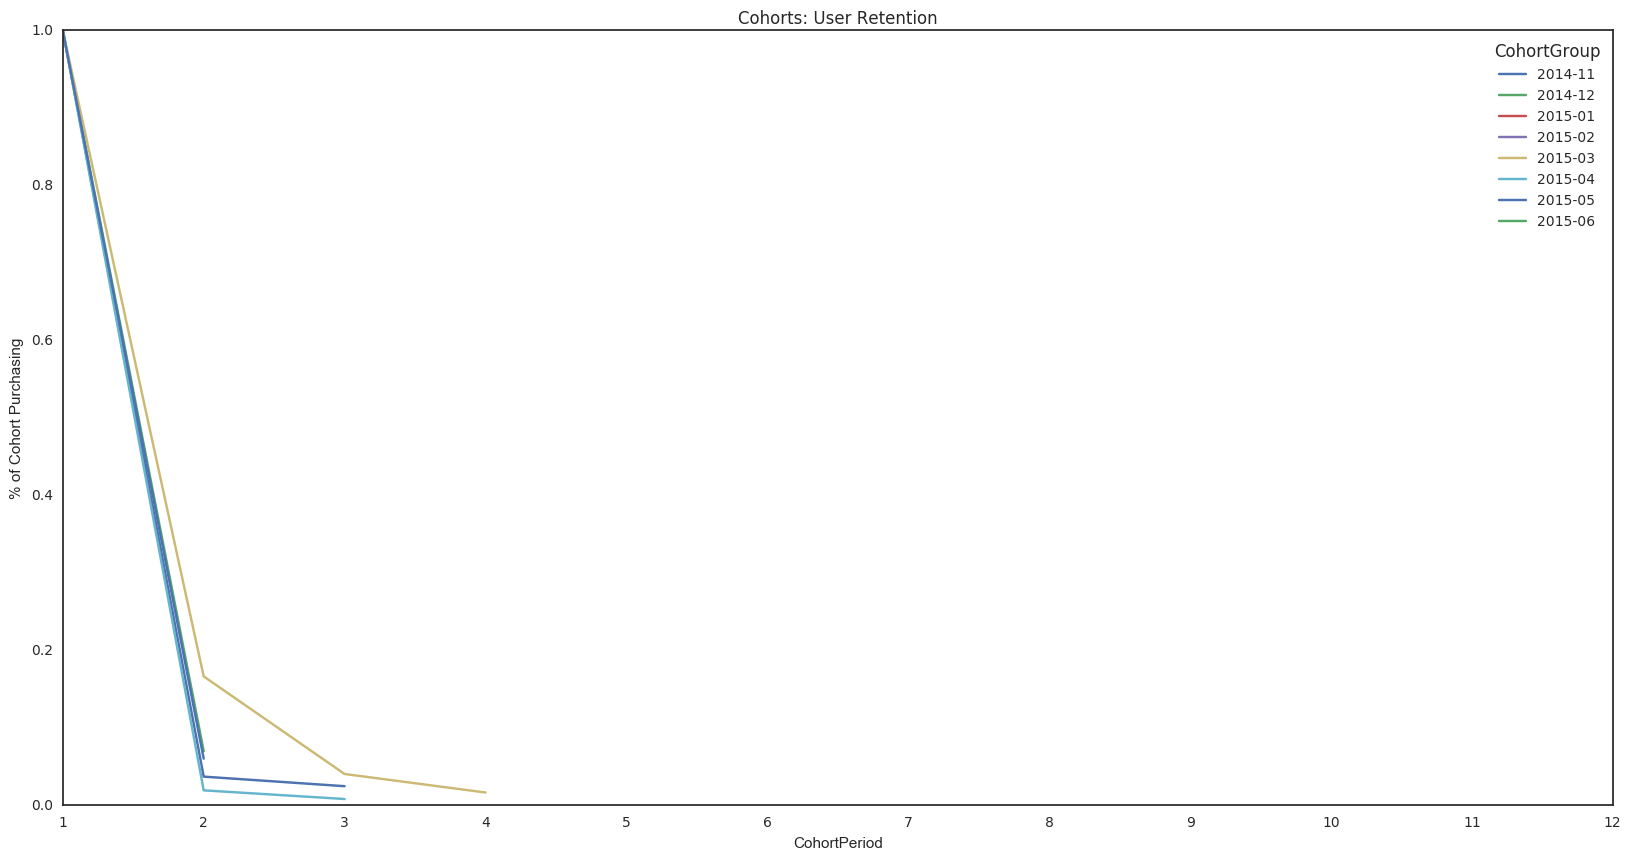

In [20]:
user_retention[list(user_retention)].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

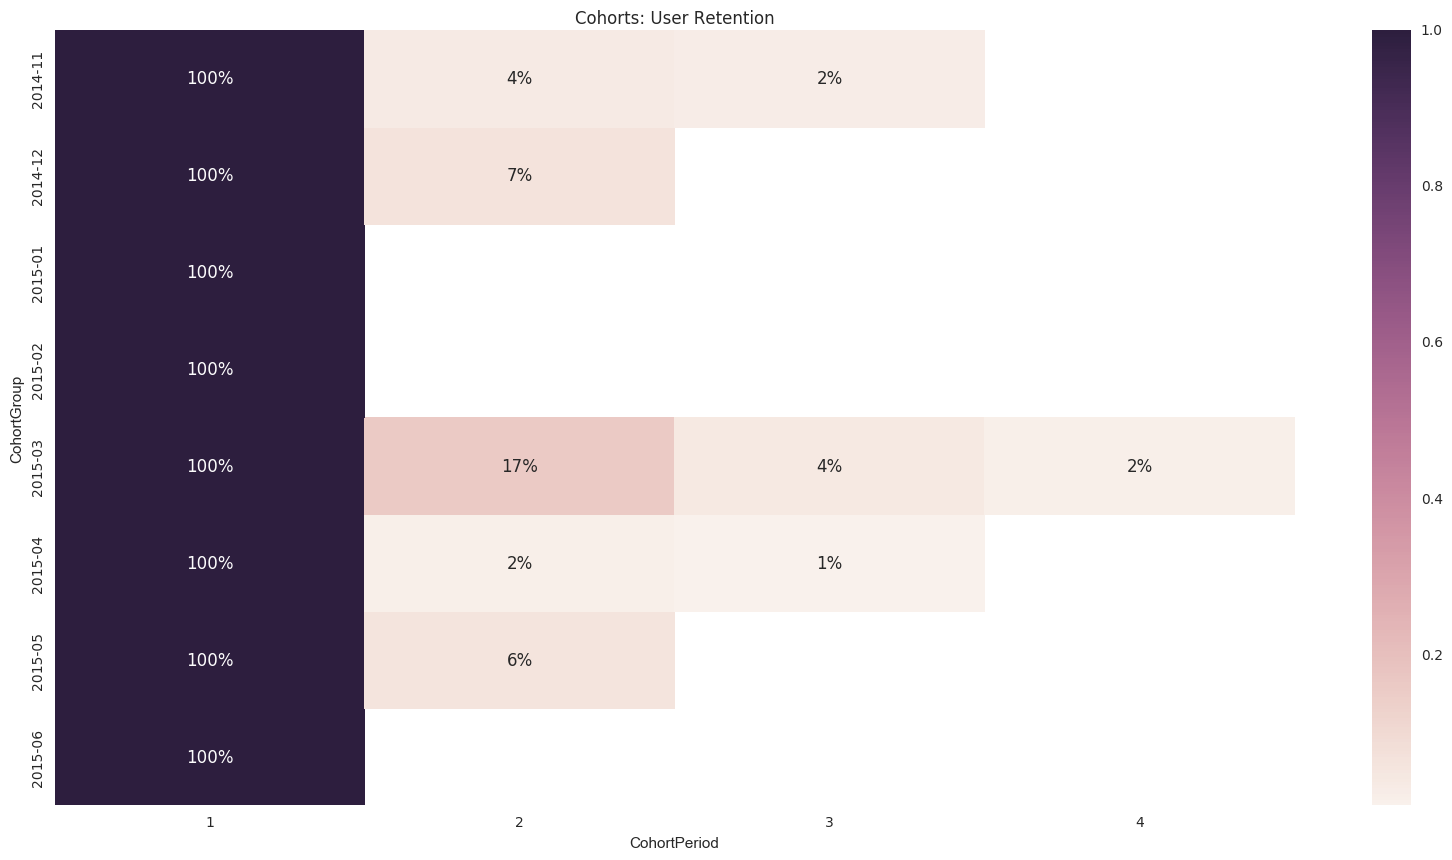

In [19]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(20, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

### Conclution from Overall Cohort Analysis:
#### March 2015 and December 2014 Has been most successful in retaing customers after 2nd day.
#### First half of 2015 has been 2 Times better than what we notice in later part of 2014.

.

.

<h1 span style="color:#0088FF"> Retention By Day of the Month the User Joined:</span>

In [8]:
df_ses['OrderPeriod'] = df_ses.datetime.apply(lambda x: x.strftime('%m-%d'))
df_ses.set_index('user_id', inplace=True)
df_ses['CohortGroup'] = df_ses.groupby(level=0)['datetime'].min().apply(lambda x: x.strftime('%m-%d'))
df_ses.reset_index(inplace=True)
grouped = df_ses.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'user_id': pd.Series.nunique,
                       'session_id': pd.Series.nunique,
                       'revenues_2w': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'user_id': 'TotalUsers',
                        'session_id': 'TotalOrders'}, inplace=True)

def cohort_period(df_ses):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd day for every user:
        df_ses.sort(['user_id', 'OrderTime', inplace=True)
        df_ses = df_ses.groupby('user_id').apply(cohort_period)
        df_ses[df_ses.CohortPeriod == 3]
    """
    df_ses['CohortPeriod'] = np.arange(len(df_ses)) + 1
    return df_ses

cohorts = cohorts.groupby(level=0).apply(cohort_period)

# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

In [103]:
user_retention.iloc[:,111:]

CohortGroup,12-01,12-02,12-03,12-04,12-05,12-06,12-08,12-09,12-10,12-11,12-19
CohortPeriod,,,,,,,,,,,
1,1.0,1.000000,1.0,1.000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
2,NaN,0.111111,1.0,0.125,1.0,1.0,0.333333,NaN,1.0,0.2,NaN


# User Retention November 2014 is show below

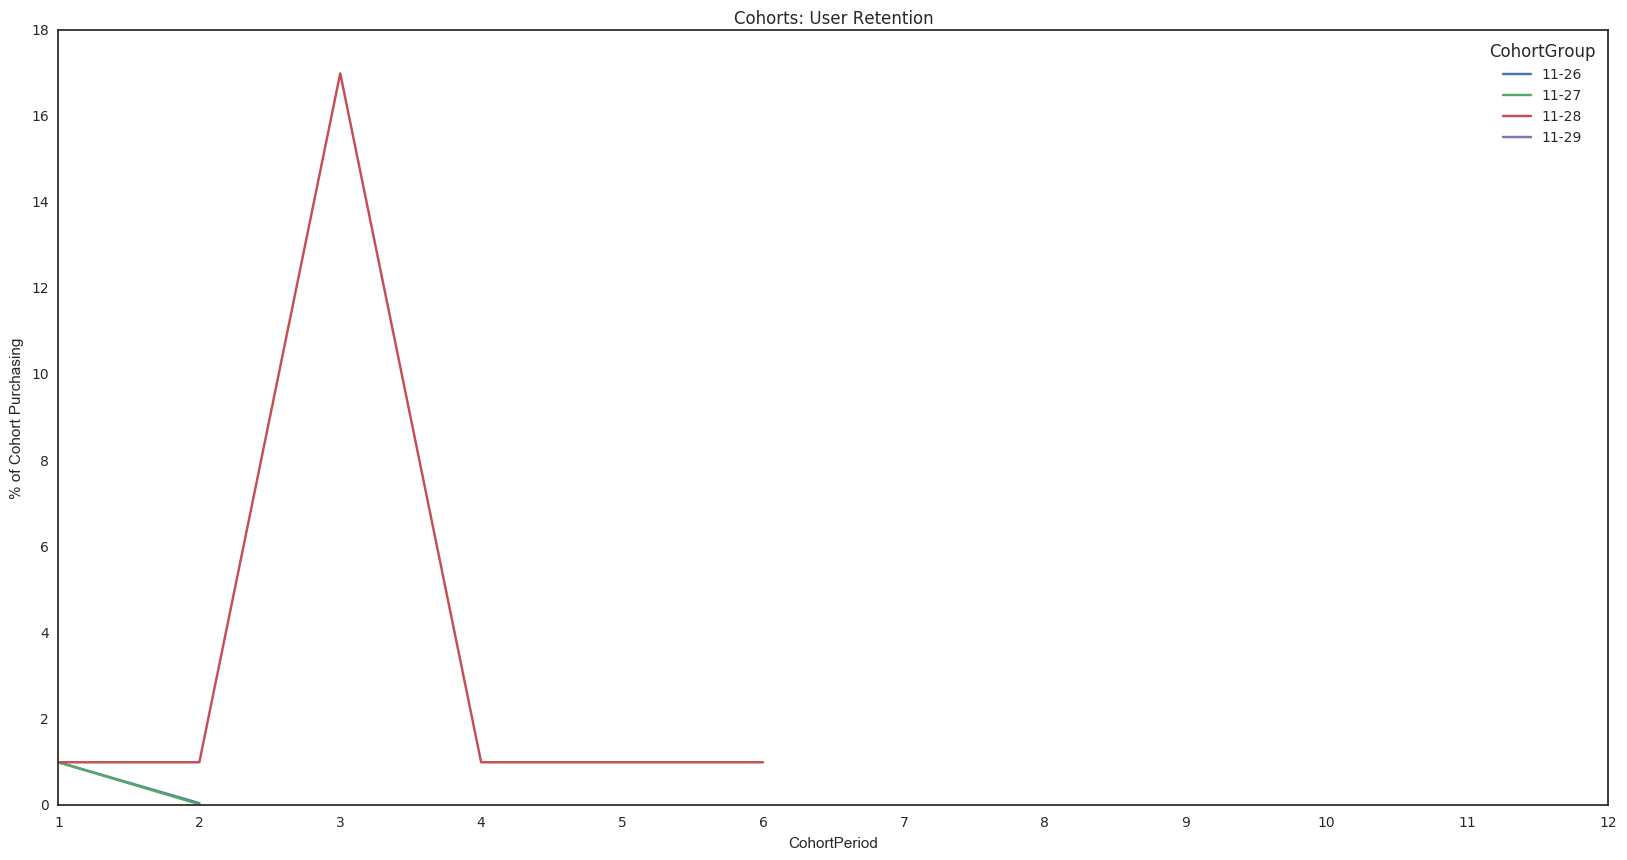

In [101]:
user_retention[list(user_retention.iloc[:,107:111])].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

### Conclution for November 2014:
#### The game was first used by users only on four days - 26th,27th,28th and 29th
#### Users who joined 28th were retained successfully for upto 4days.

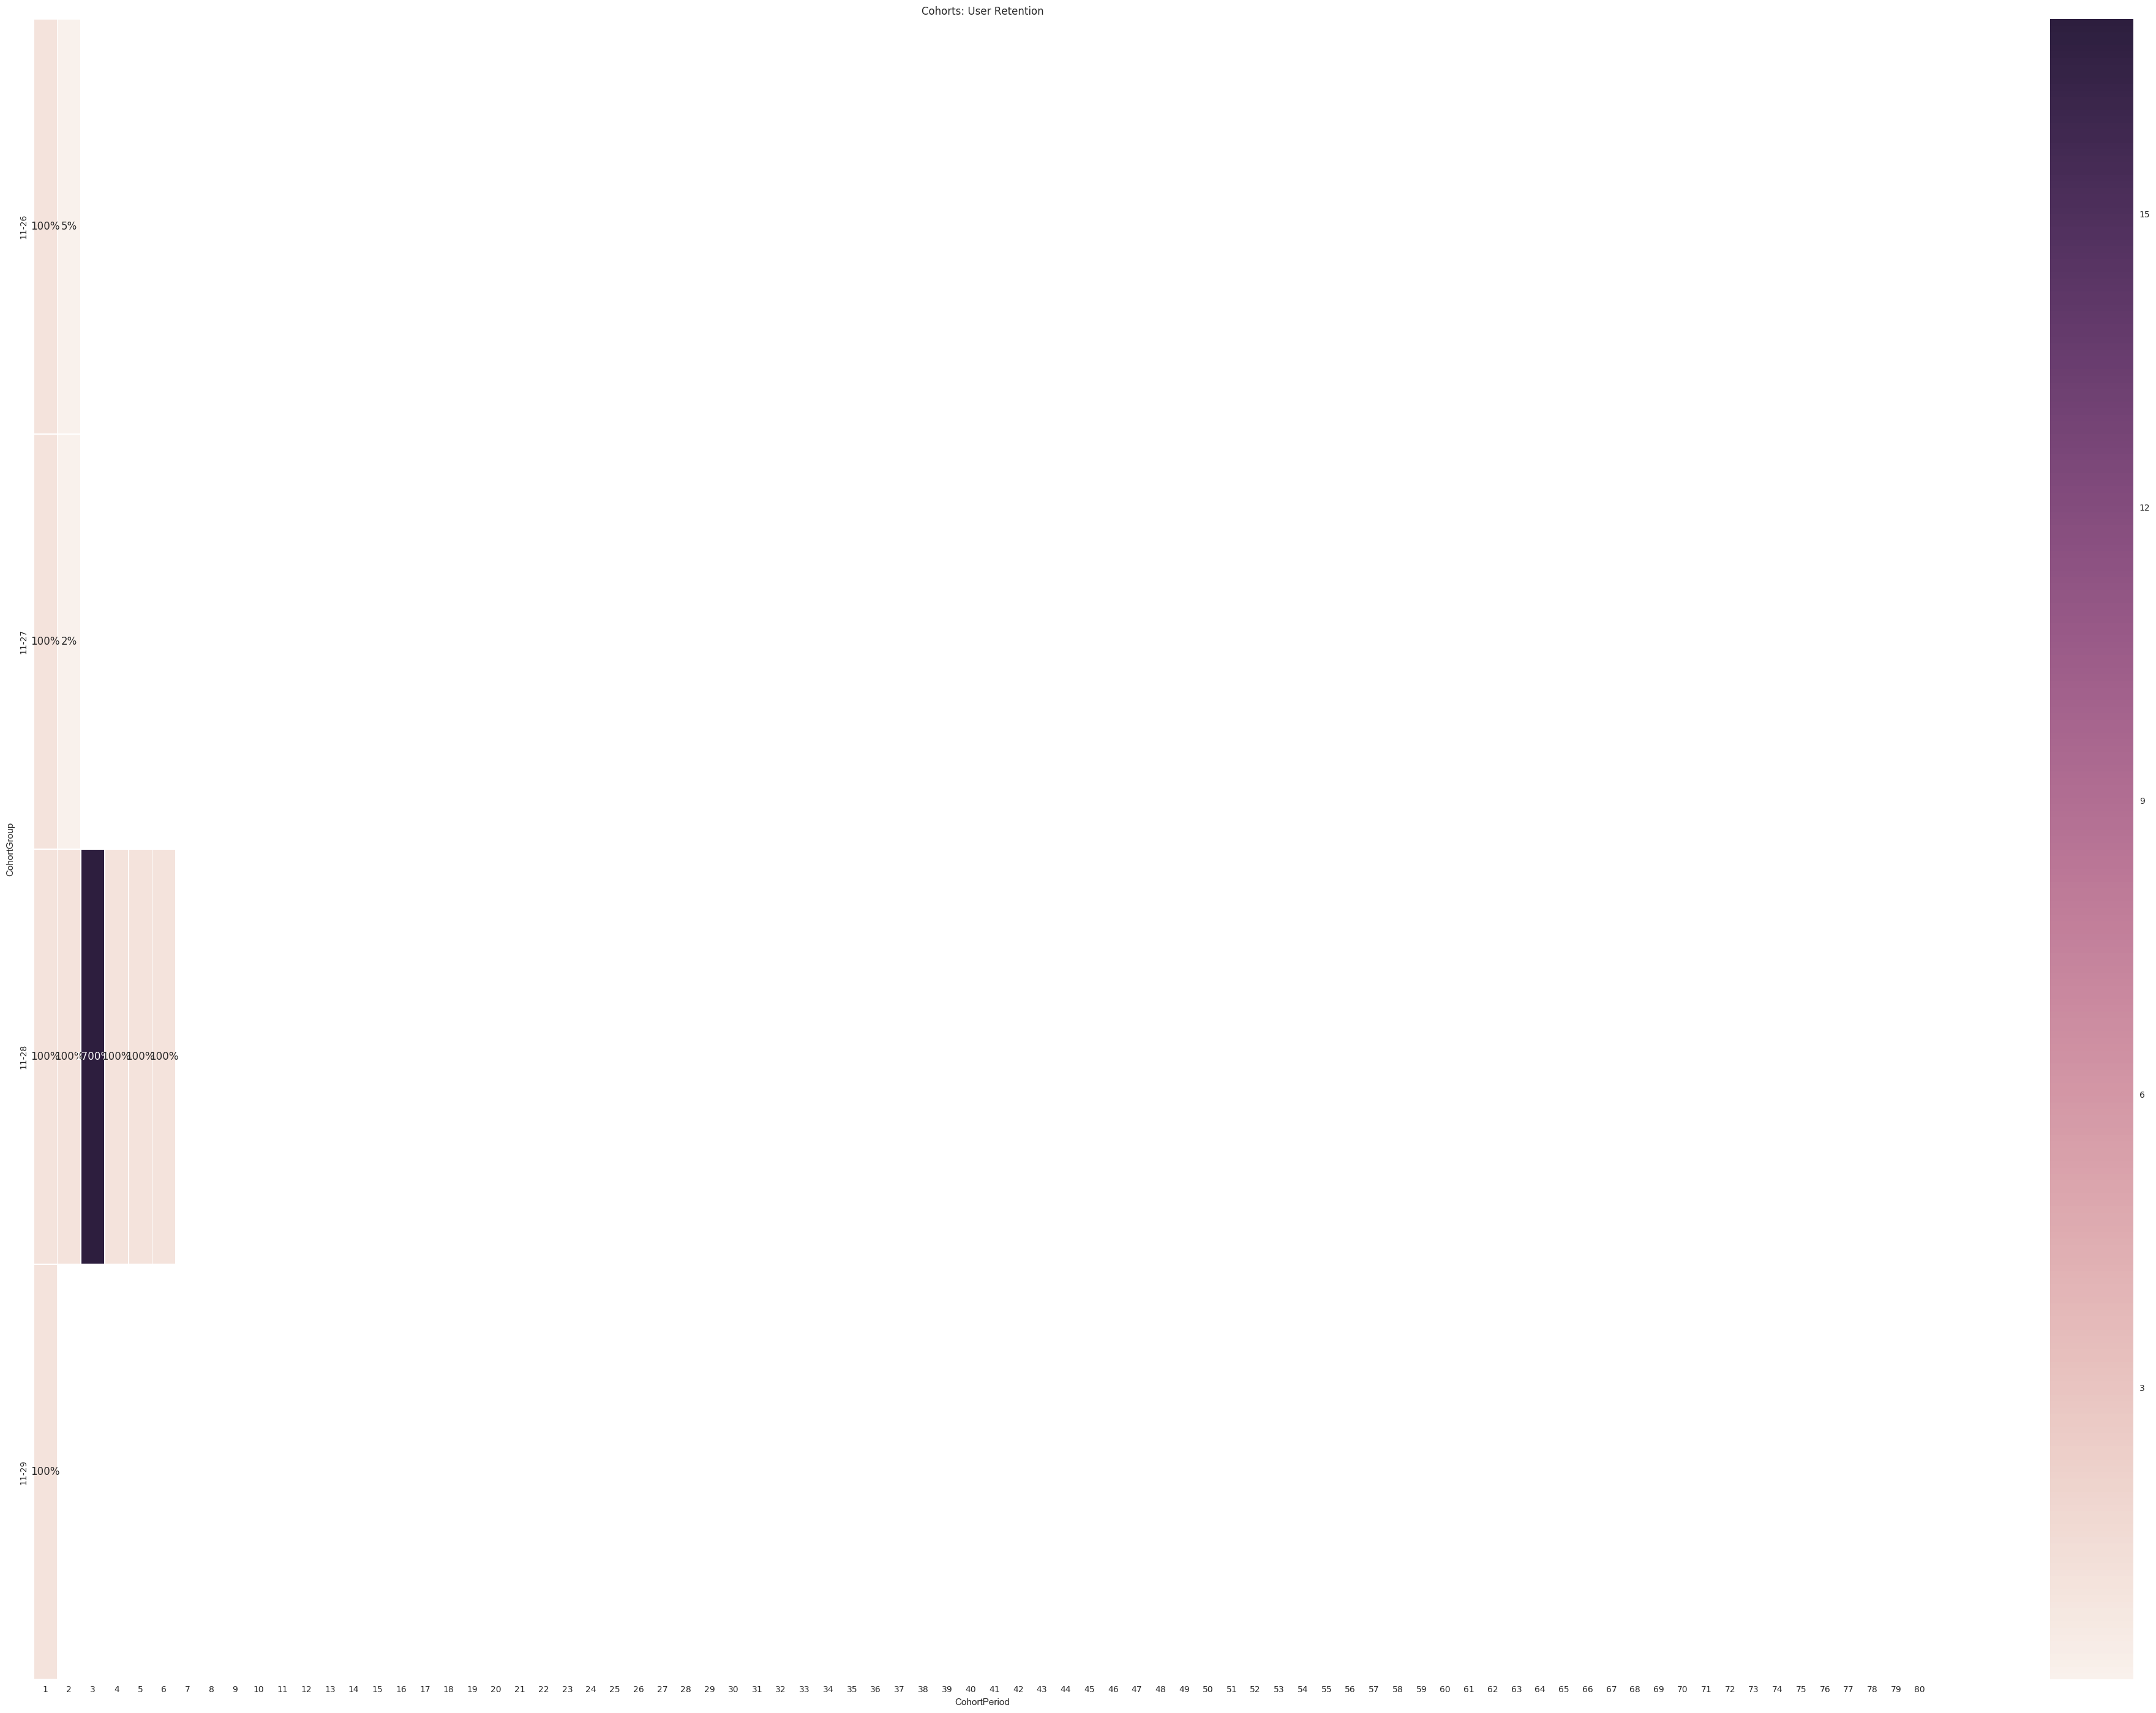

In [102]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(50, 35))
plt.title('Cohorts: User Retention')
plt.ylim(1, 31)
sns.heatmap(user_retention.iloc[:,107:111].T, mask=user_retention.iloc[:,107:111].T.isnull(), annot=True, fmt='.0%',linewidths=.5,xticklabels=True);

### Conclution November 2014:
#### Return Customers are noticed on third since forst joinin on 28th November.

.

# User Retention Dec 2014 is show below

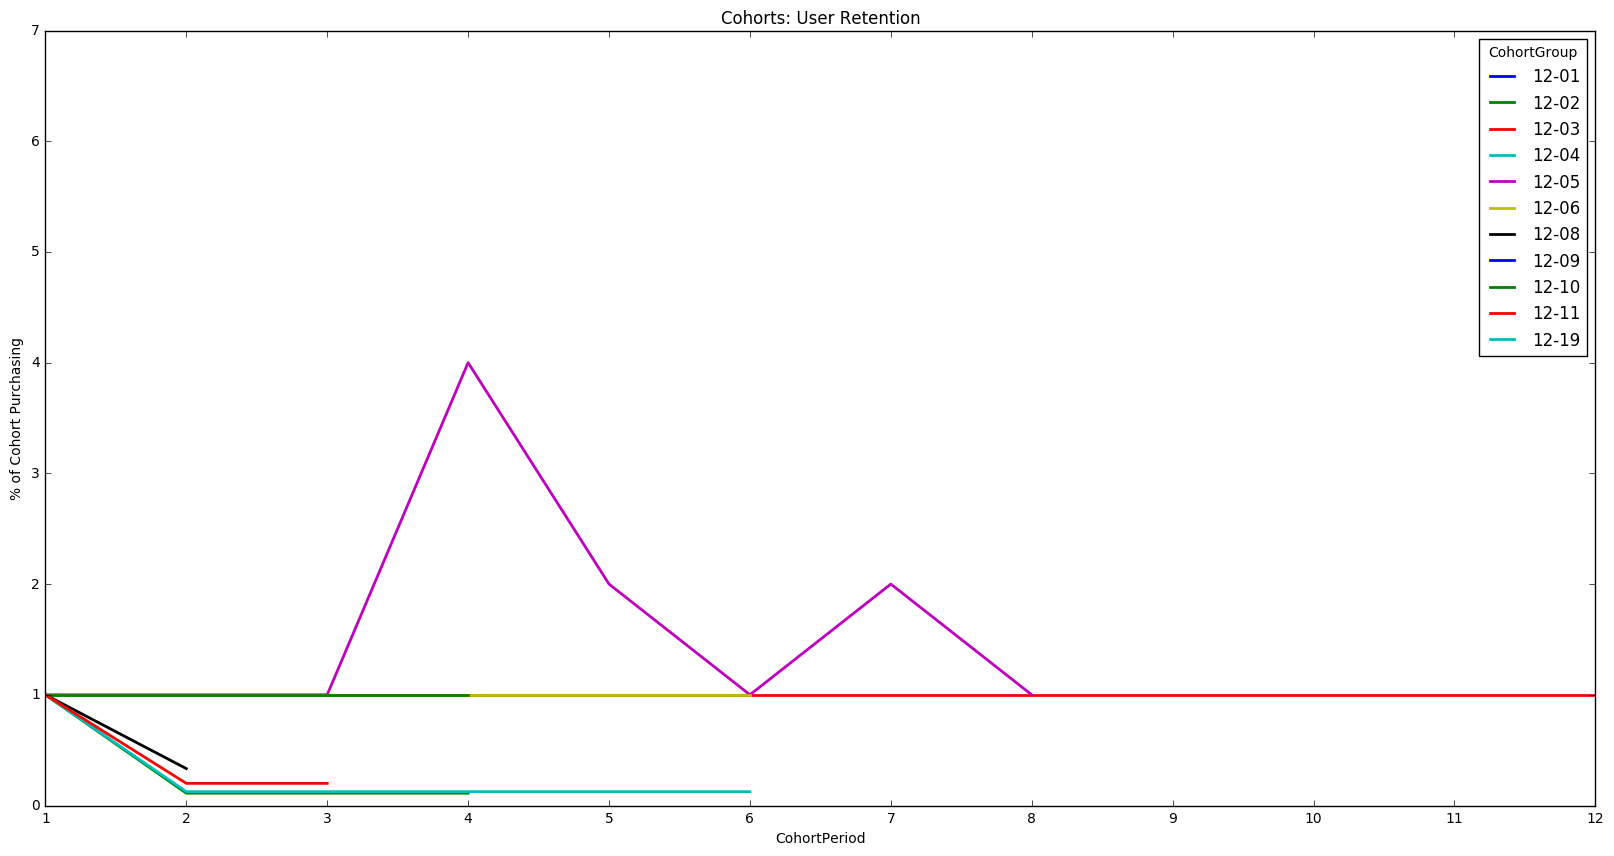

In [11]:
user_retention[list(user_retention.iloc[:,111:])].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

### Conclution Dec 2014:
#### Almost 80% of the users are retained upto 1 week of first playing the game.
#### Many repurchases came around 3rd day for customers who joined on 5th of December.

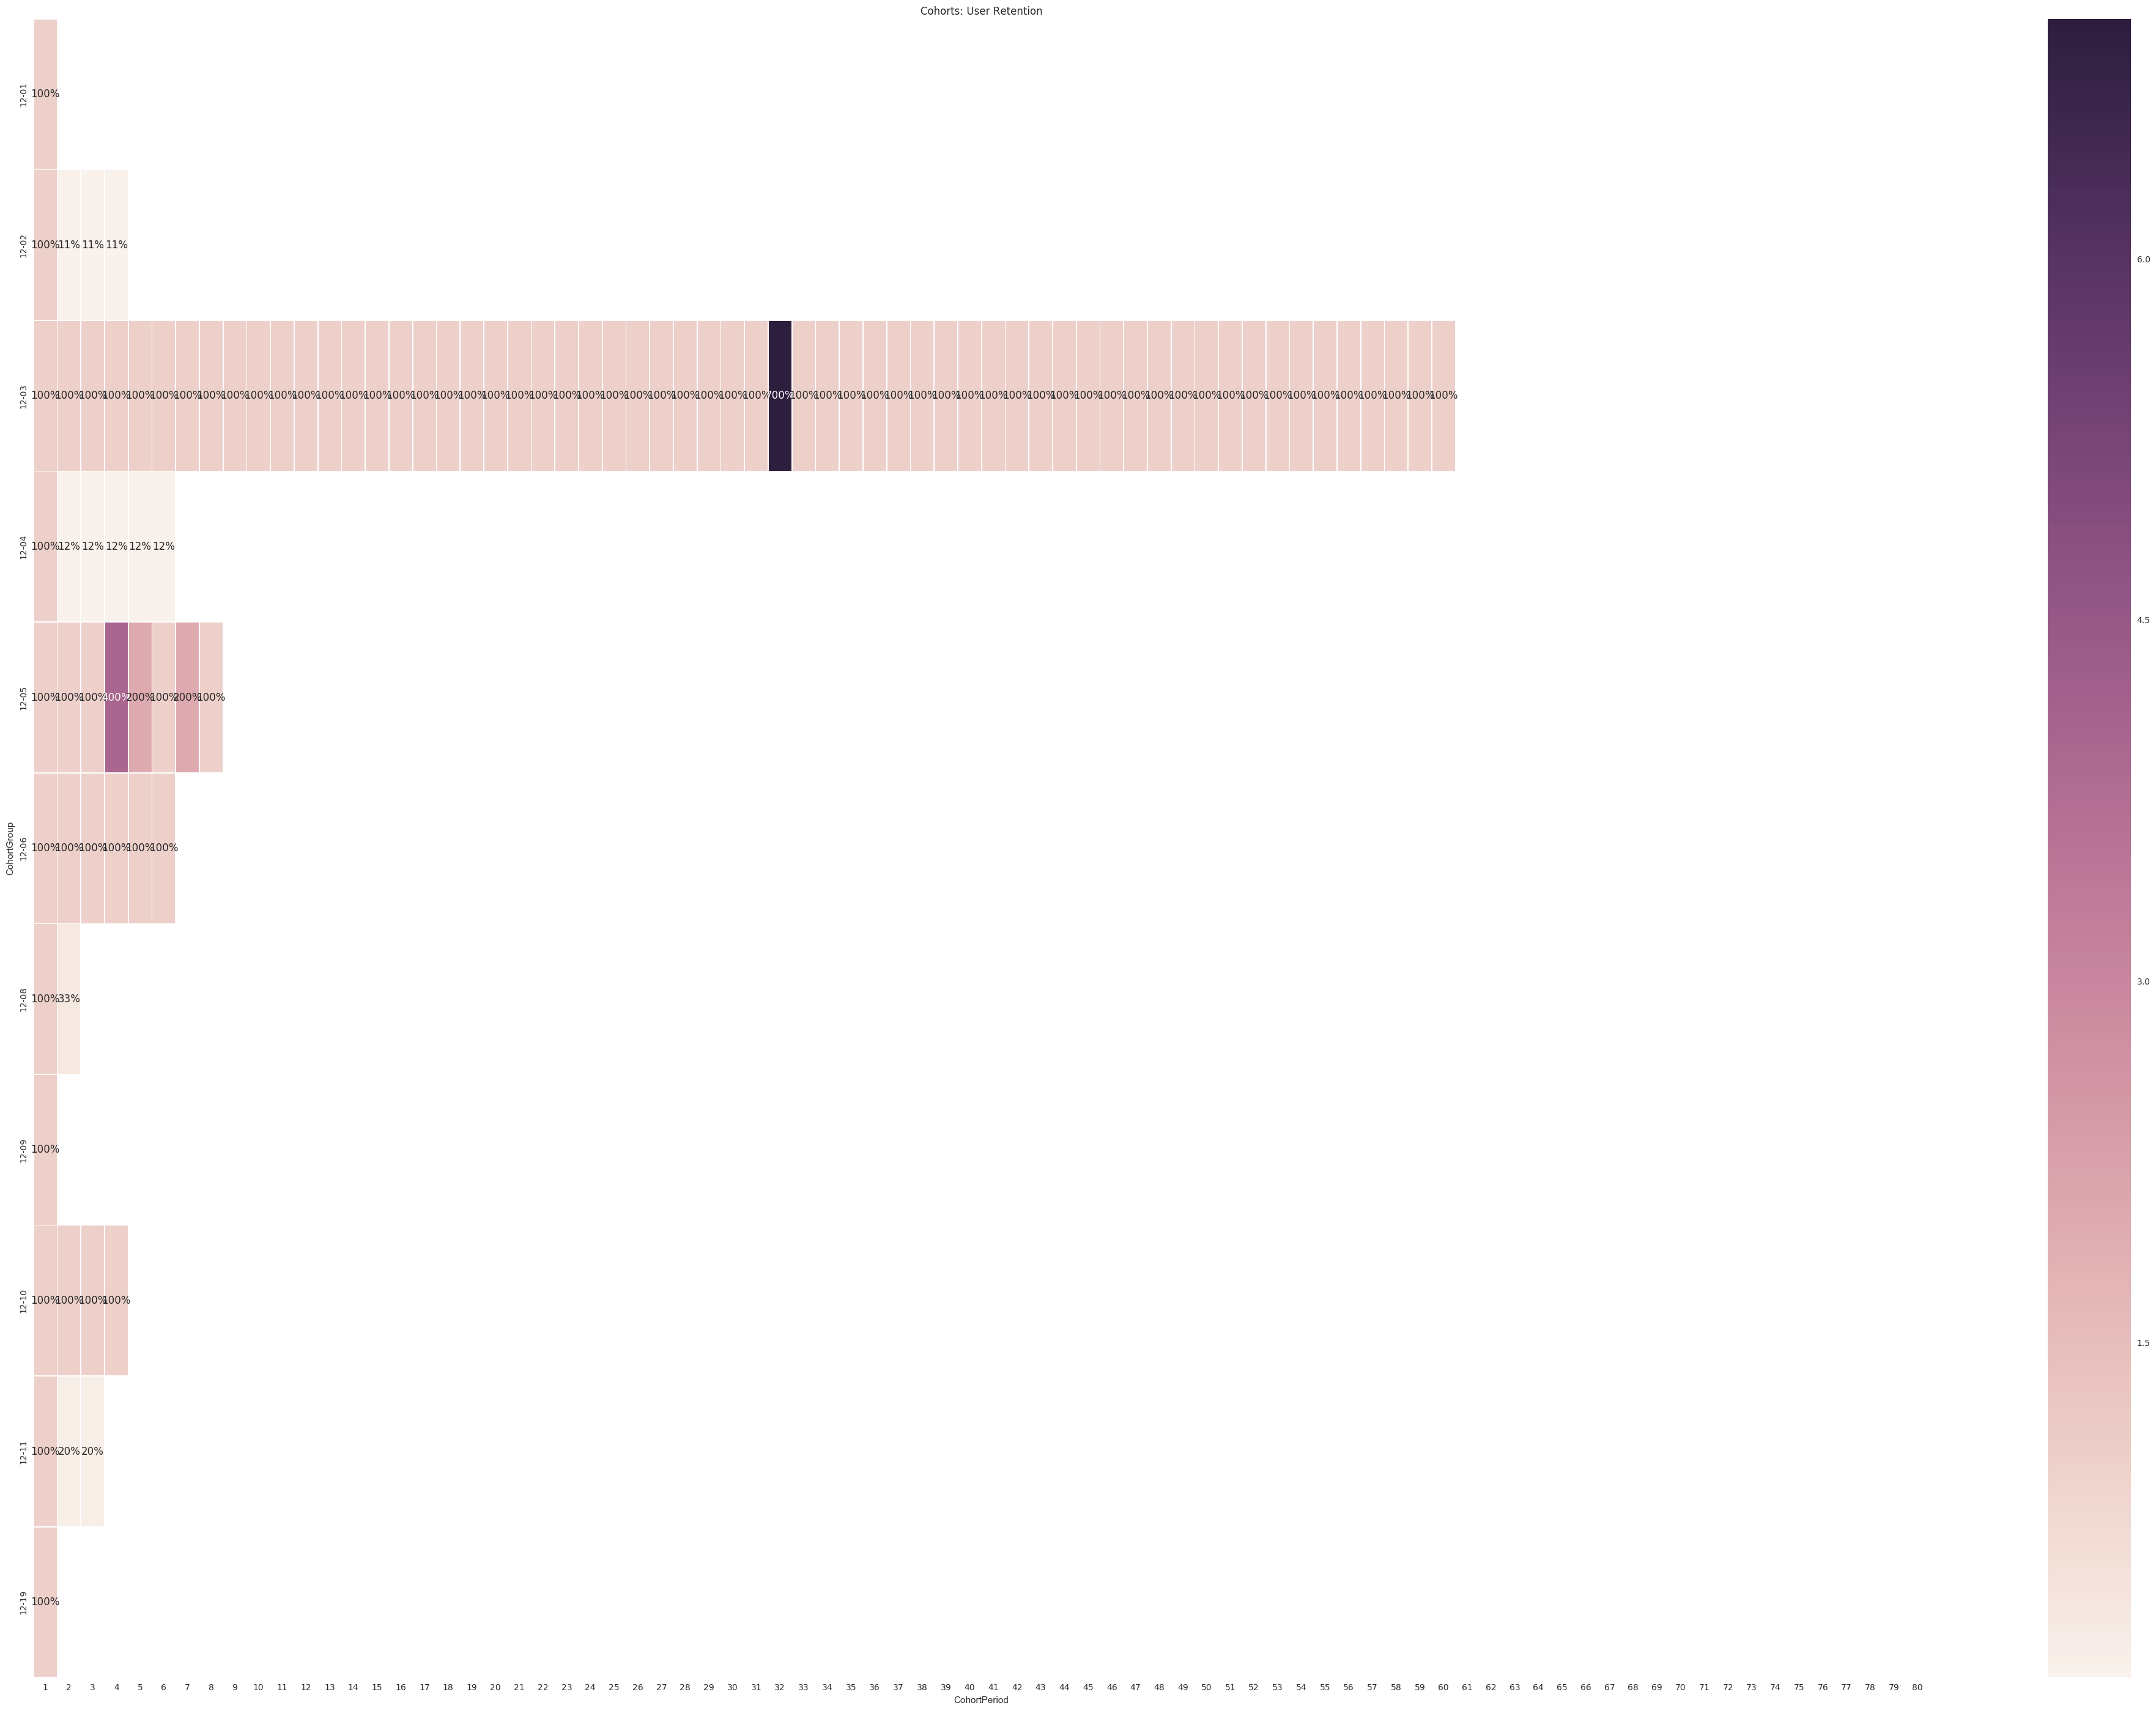

In [12]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(50, 35))
plt.title('Cohorts: User Retention')
plt.ylim(1, 31)
sns.heatmap(user_retention.iloc[:,111:].T, mask=user_retention.iloc[:,111:].T.isnull(), annot=True, fmt='.0%',linewidths=.5,xticklabels=True);

### Conclution Dec 2014:
#### 69% of the users joined the application in 1st week of Dec 2014,
#### Almost 100% of the users were retained on most of the days.

.

# User Retention January 2015:
### Conclution Jan:
#### 100% For 1st day, then Zero for rest
#### 0% of the users were retained after 1st day
#### Users only joined on two days - 7th and 8th of January.


# User Retention Feb 2015:
### Conclution Feb
#### 100% For 1st day, then Zero for rest
#### 0% Users were retained after 1st day.
#### Users used the application only on 13th and 26th of Feb. 

.

# User Retention March 2015 is show below

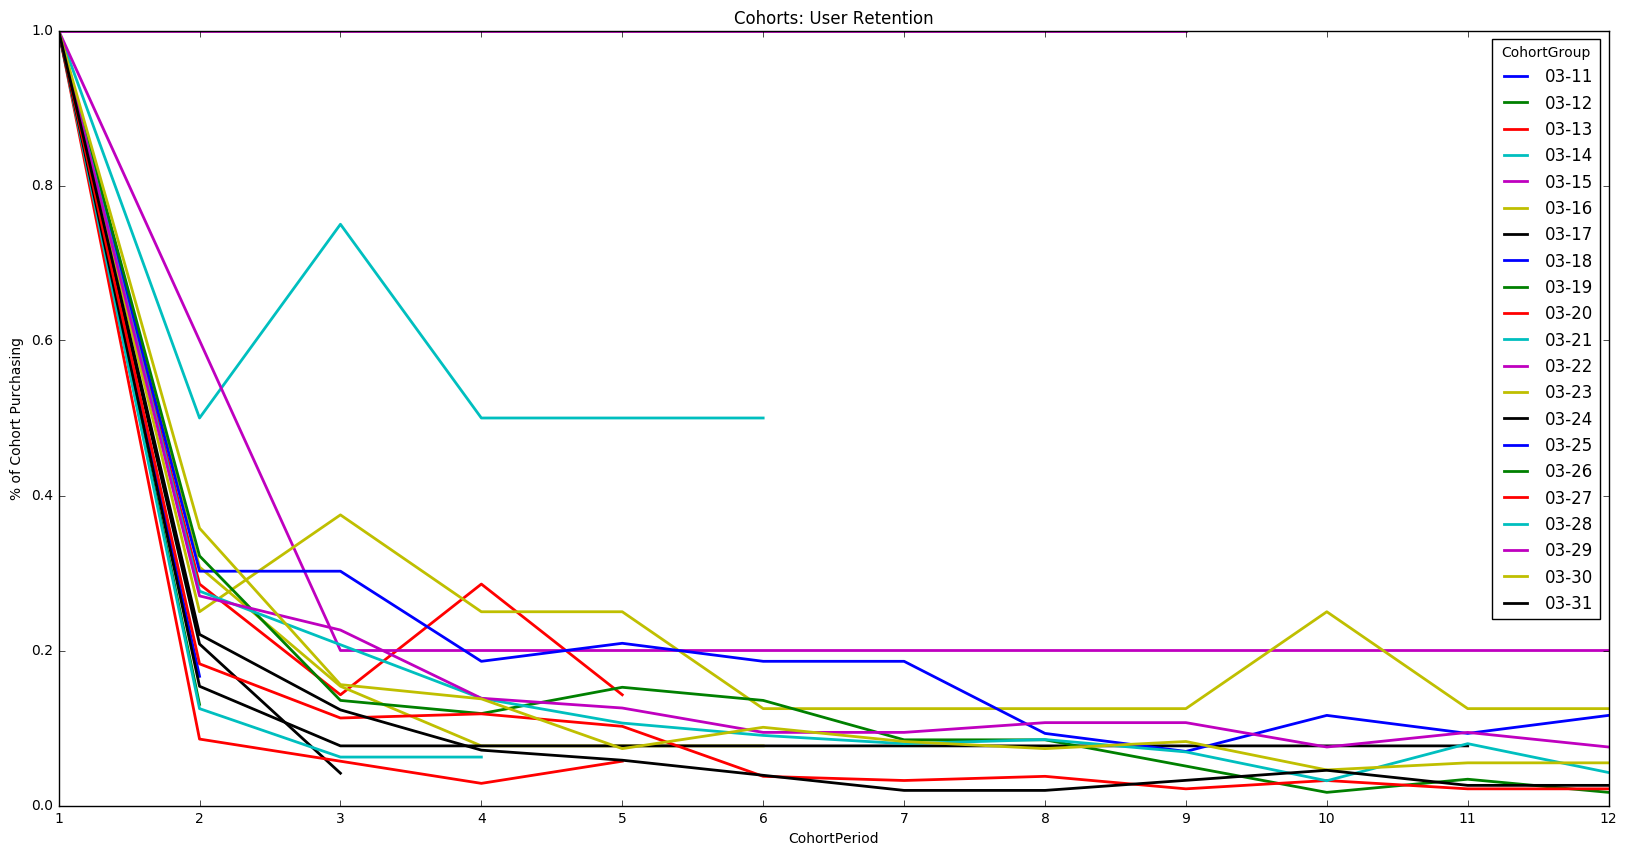

In [36]:
user_retention[list(user_retention.iloc[:,4:25])].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

### Conclution March:
#### 45% of customers are retained on 2nd day who visited after first 10 days of the month.
#### 5%-10% Users were retained for more than 12 days.

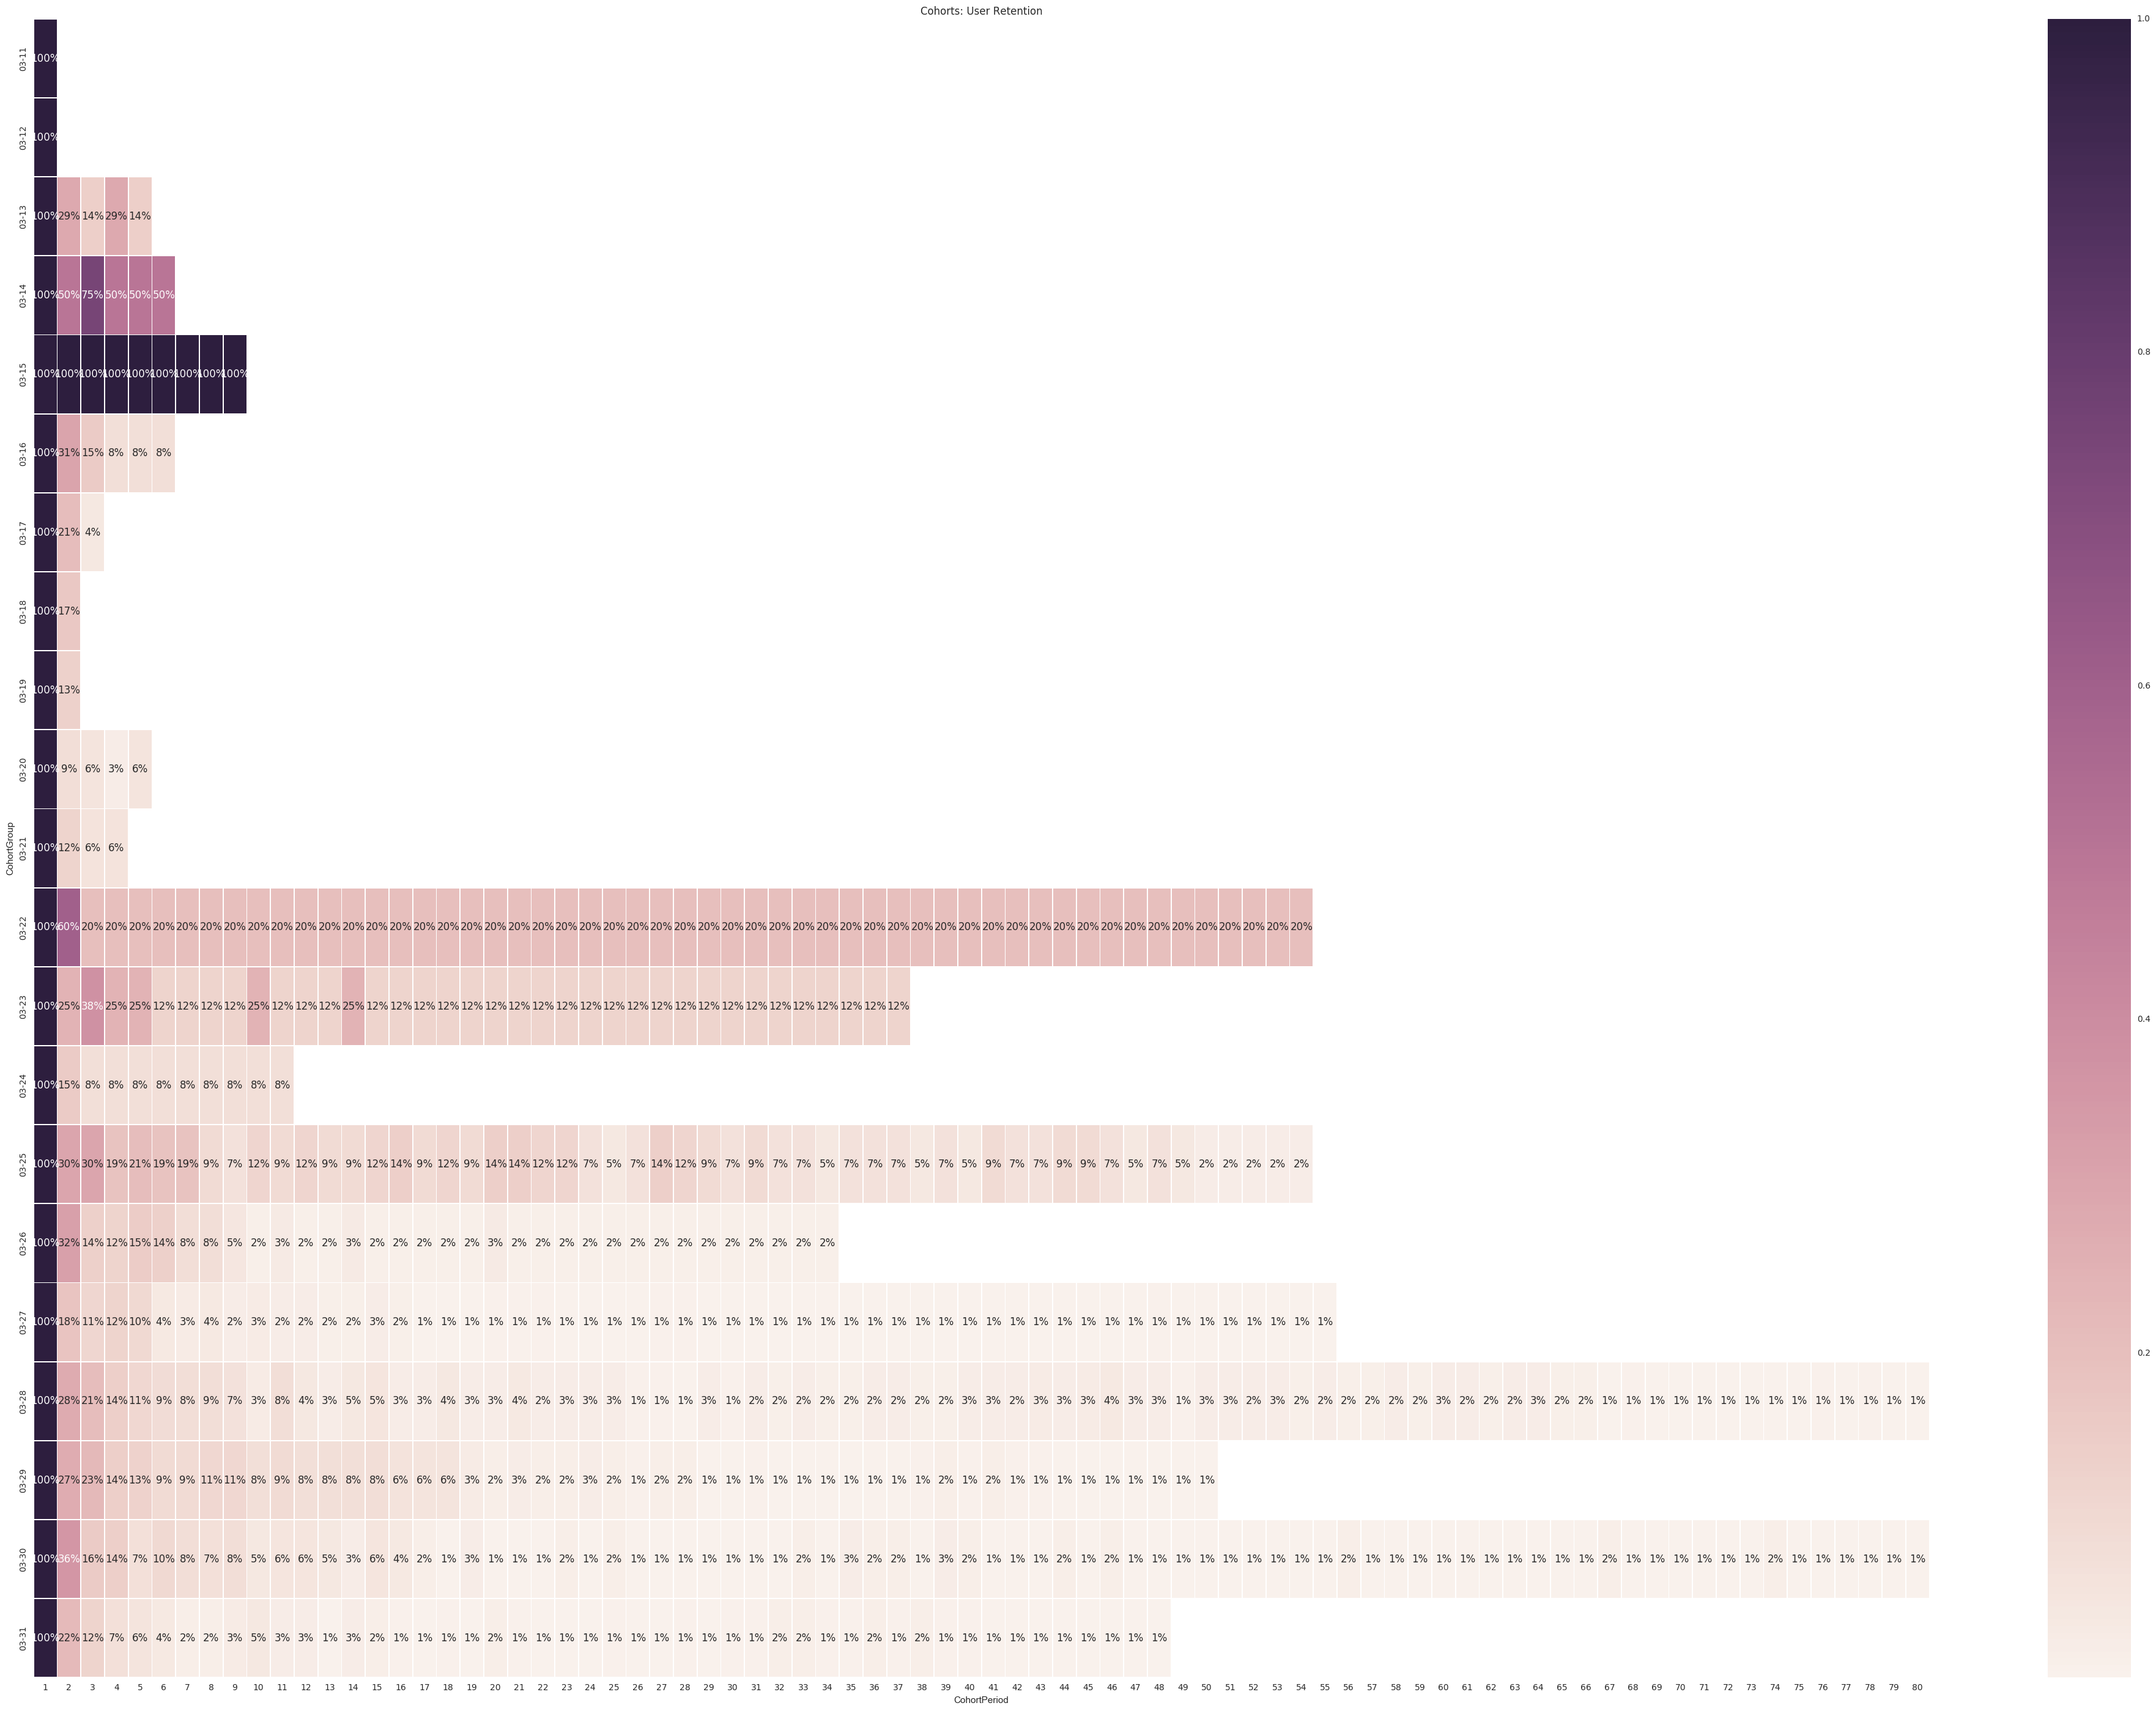

In [76]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(50, 35))
plt.title('Cohorts: User Retention')
plt.ylim(1, 31)
sns.heatmap(user_retention.iloc[:,4:25].T, mask=user_retention.iloc[:,4:25].T.isnull(), annot=True, fmt='.0%',linewidths=.5,xticklabels=True);

### Conclution March:
#### Most successful Month for the application so far.
#### 1) Users who joined on 15th of March were retained 100% for 8 days.
#### 2) More users stayed who joined later in the month, mostly after 2nd week.
#### 3) All users left on 1st day in the first week which is not seen in later months to come.

.

# User Retention April 2015 is show below

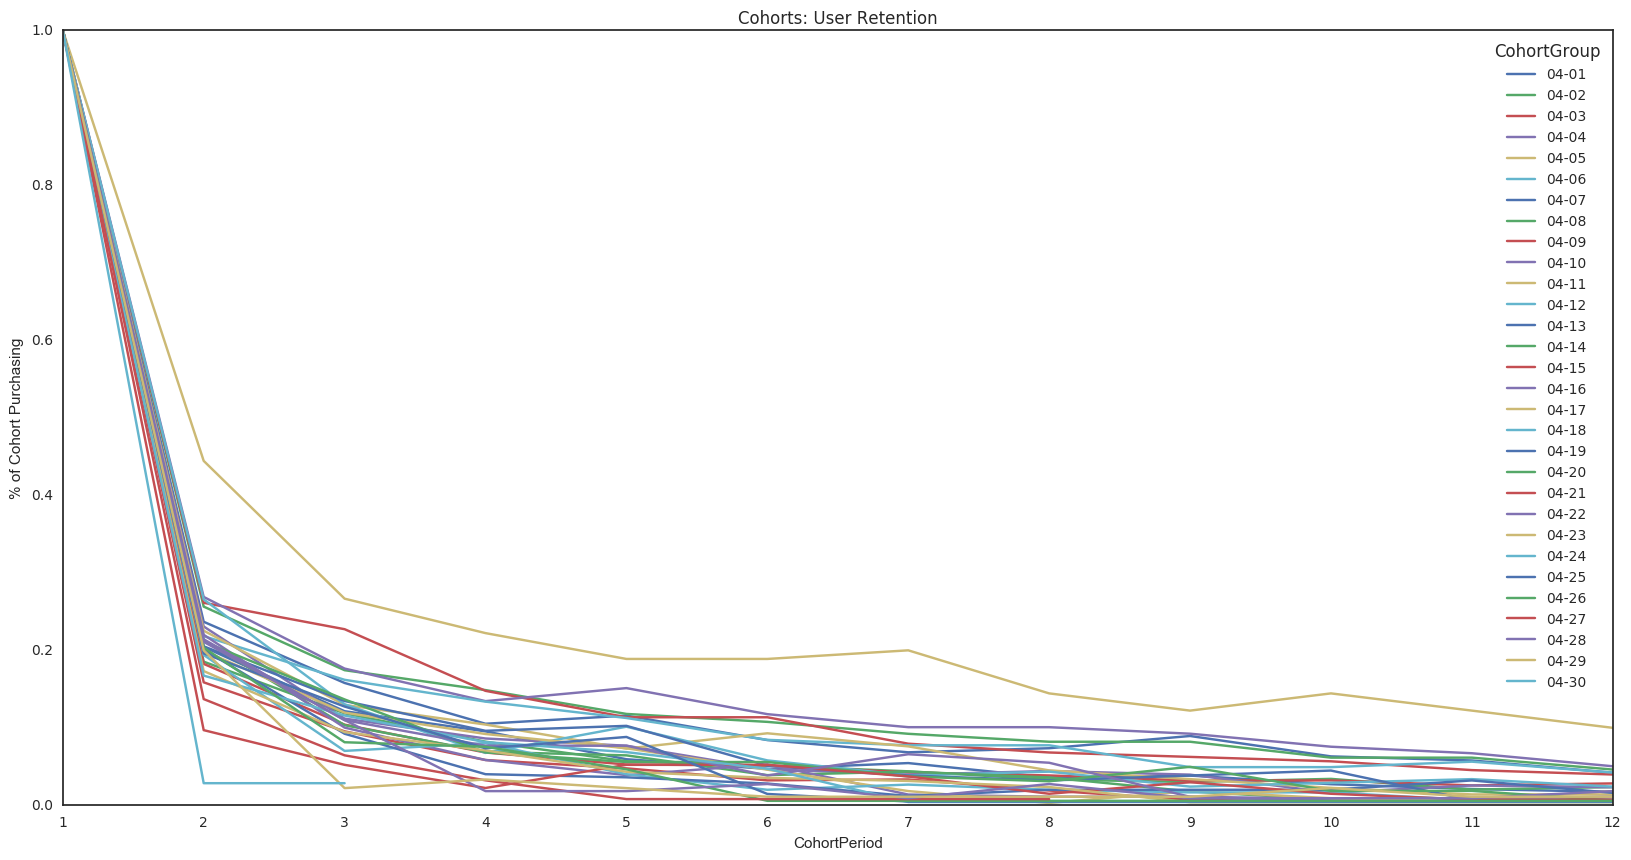

In [82]:
user_retention[list(user_retention.iloc[:,25:55])].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

### Conclution April:
#### Most users leave by second day of joining 1% stay upto 12+ days

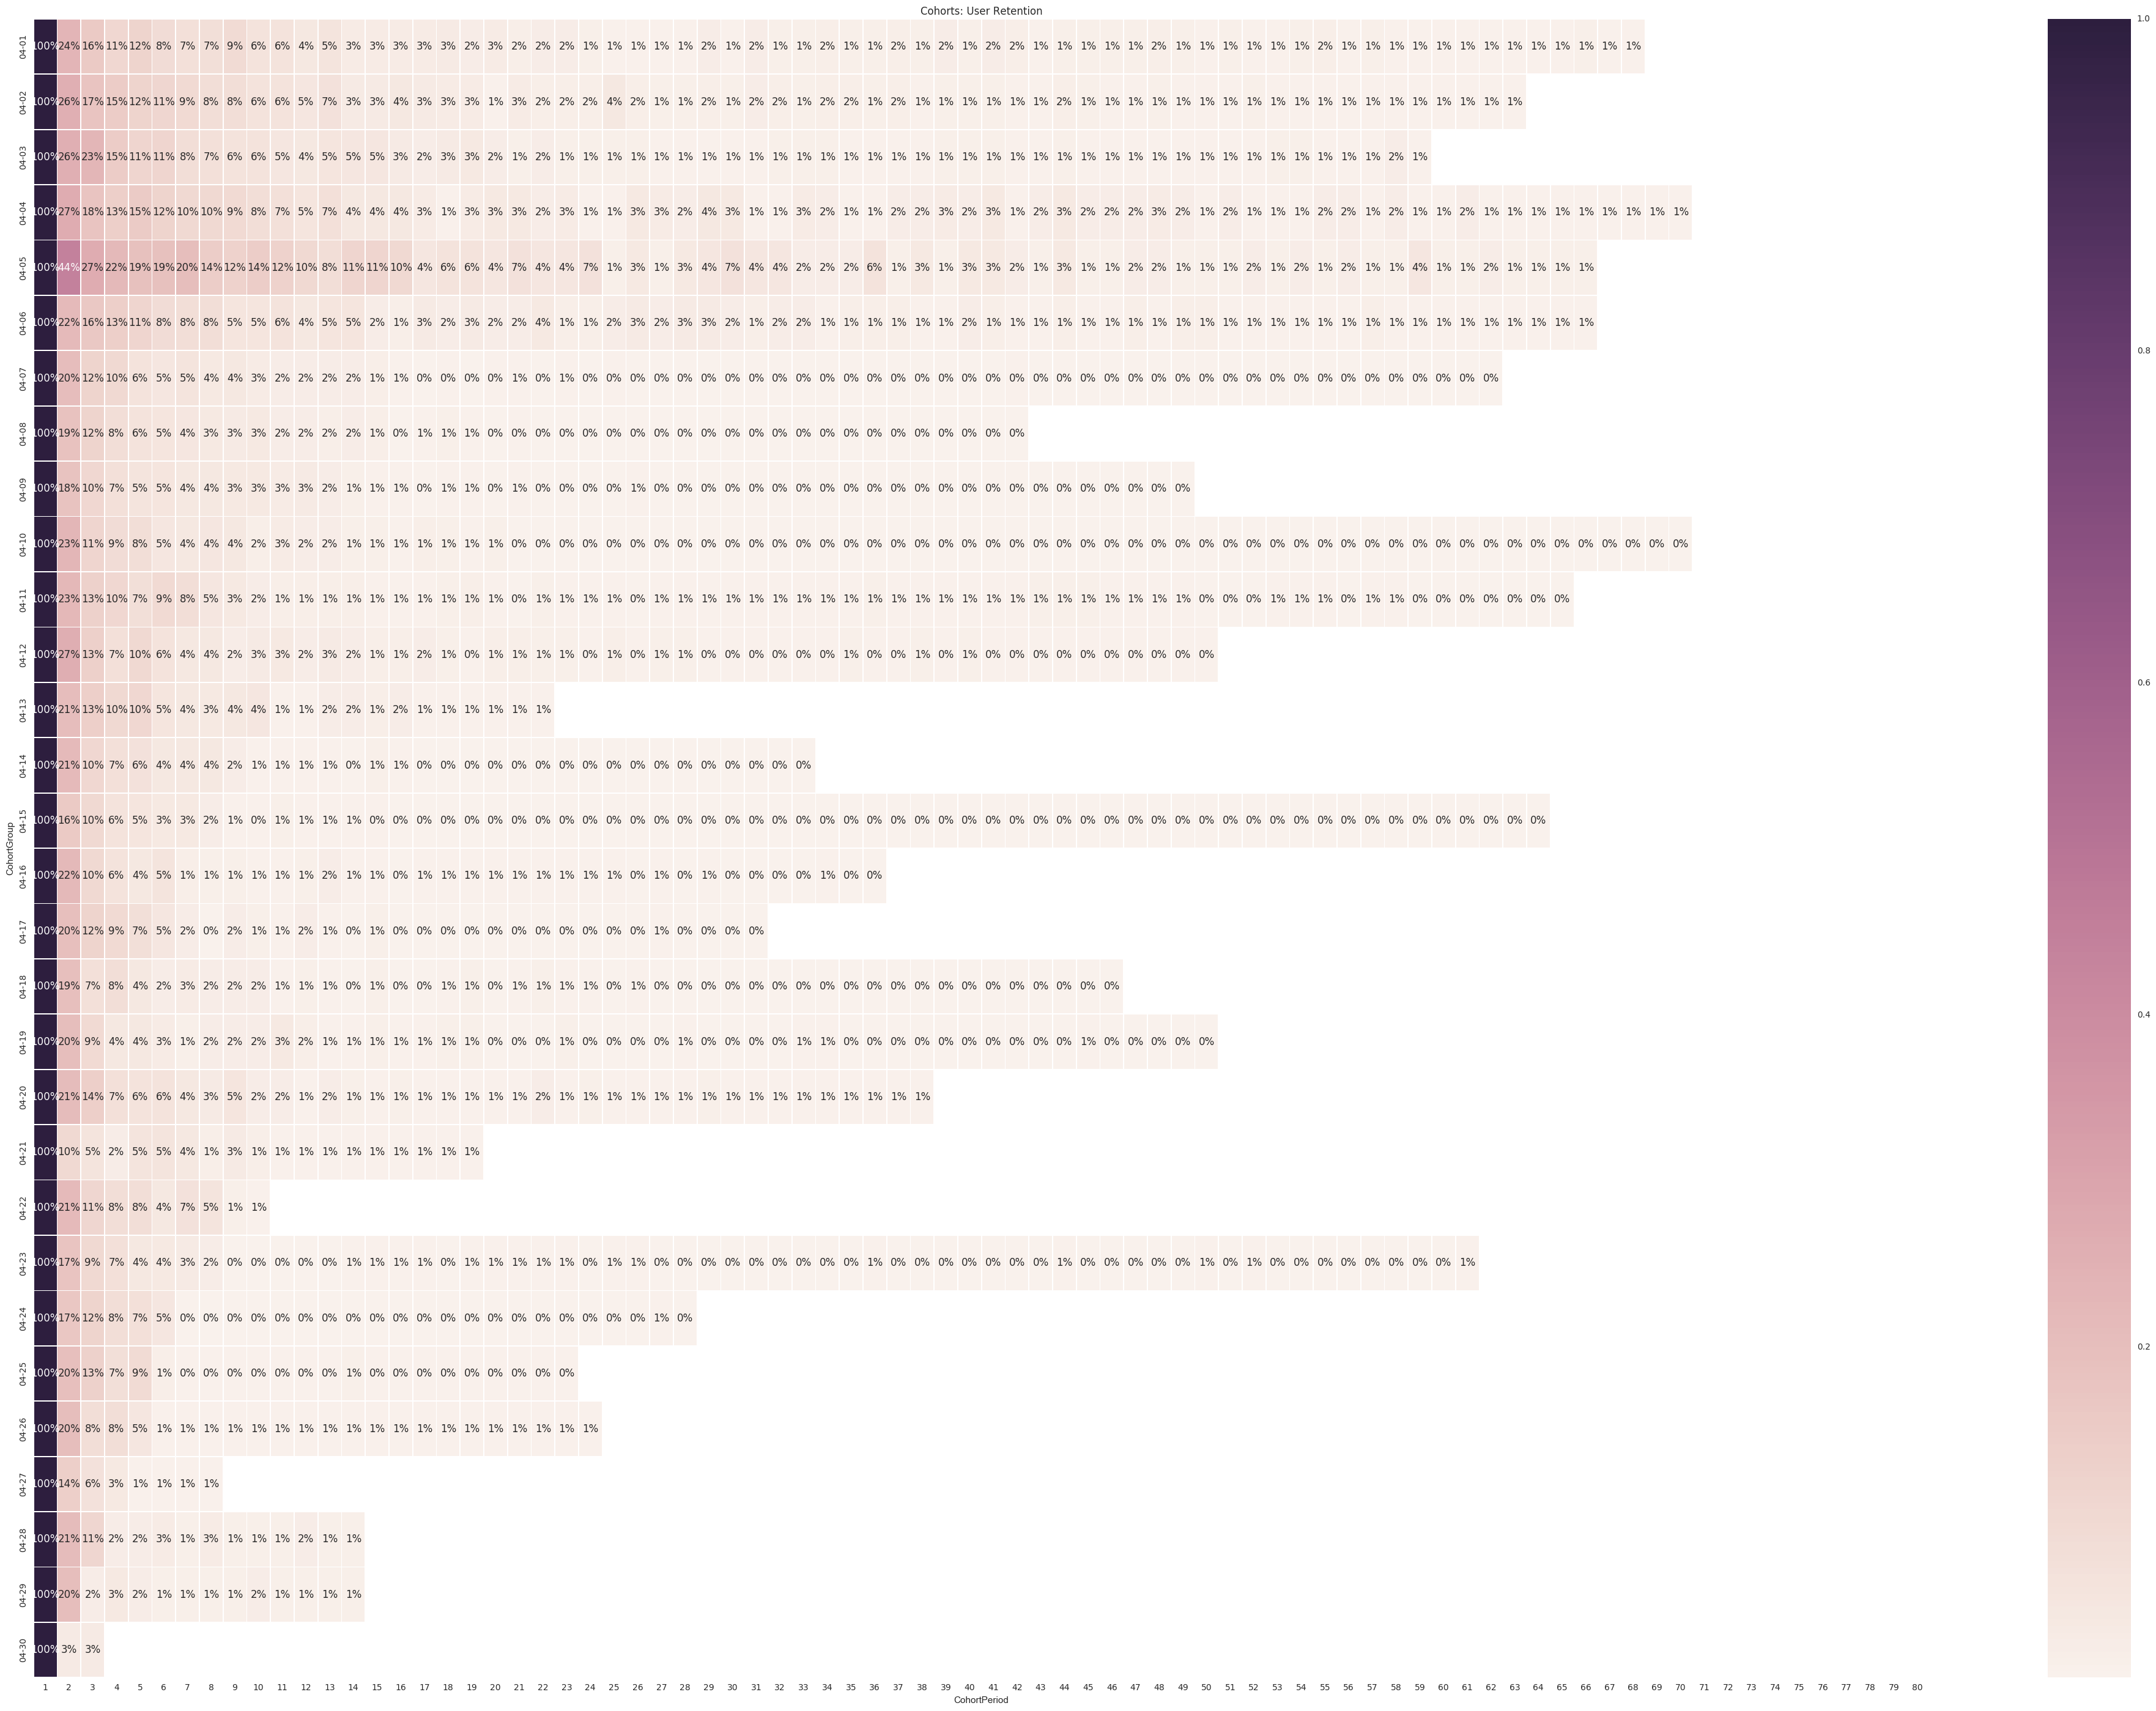

In [83]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(50, 35))
plt.title('Cohorts: User Retention')
plt.ylim(1, 31)
sns.heatmap(user_retention.iloc[:,25:55].T, mask=user_retention.iloc[:,25:55].T.isnull(), annot=True, fmt='.0%',linewidths=.5,xticklabels=True);

### Conclusion April:
#### 1) 80%-85% of Users leave after 1st day.
#### 2) Retention of 1%-2% Users till 50-60 days.
#### 3) 5th day of April has been the most succesful day, users who joined on 5th of April, 25% were retained upto 3rd day, and 12% were retained upto 10-12 days

.

# User Retention May 2015 is show below

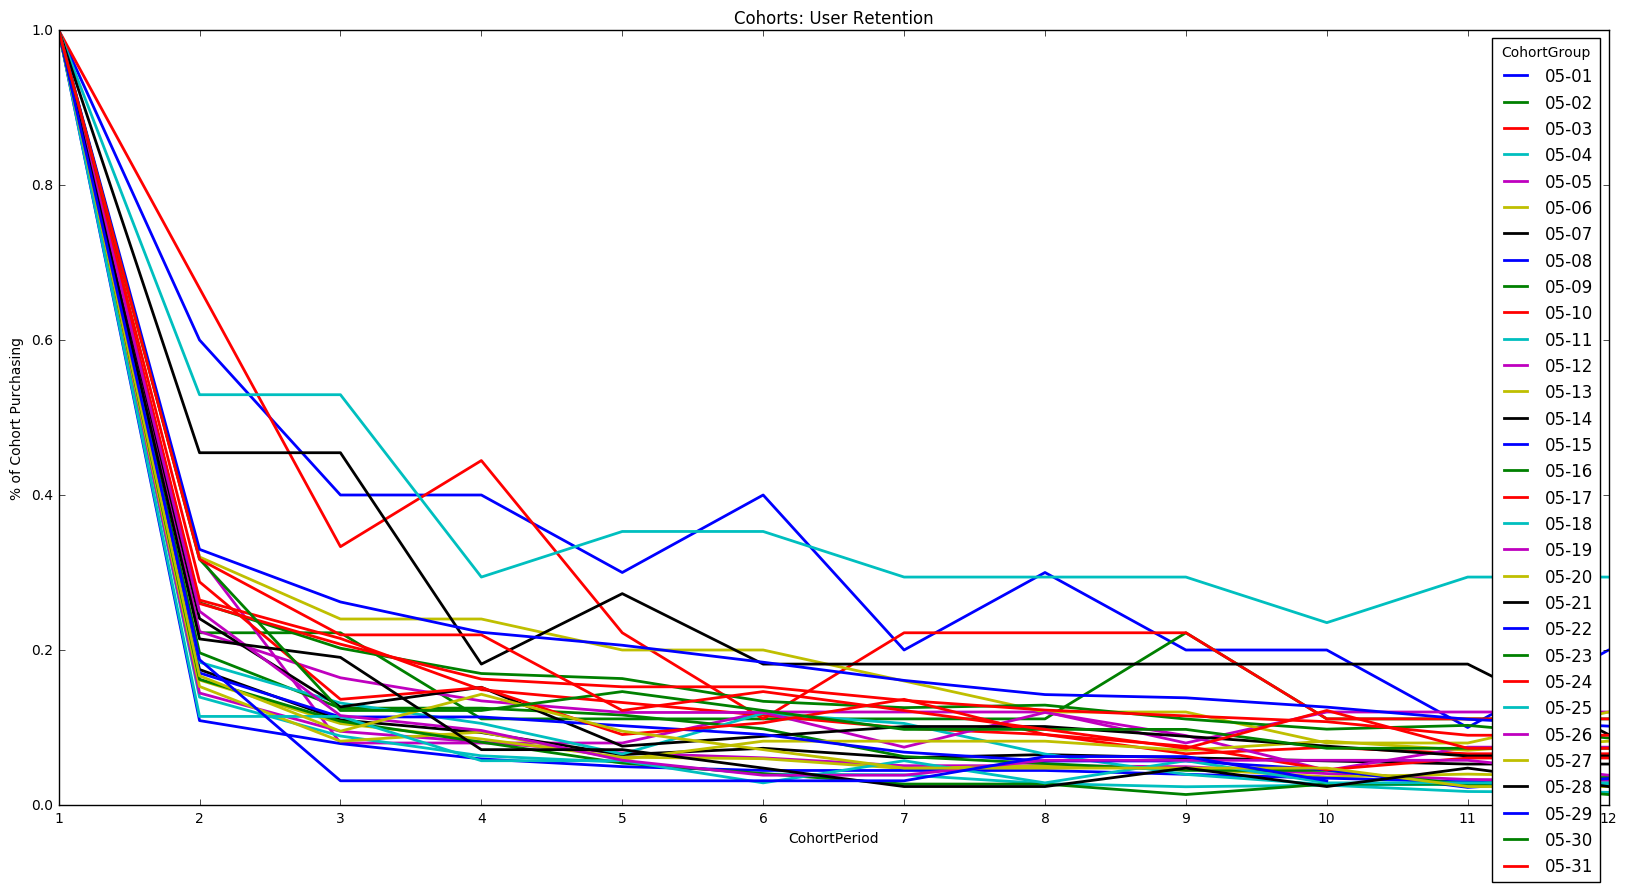

In [9]:
user_retention[list(user_retention.iloc[:,55:86])].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

### Conclusion May:
#### 30% users are retained till 3rd day, and 40 %Users are retained till 2nd day.
#### User make purchases between 7 to 5 days difference.

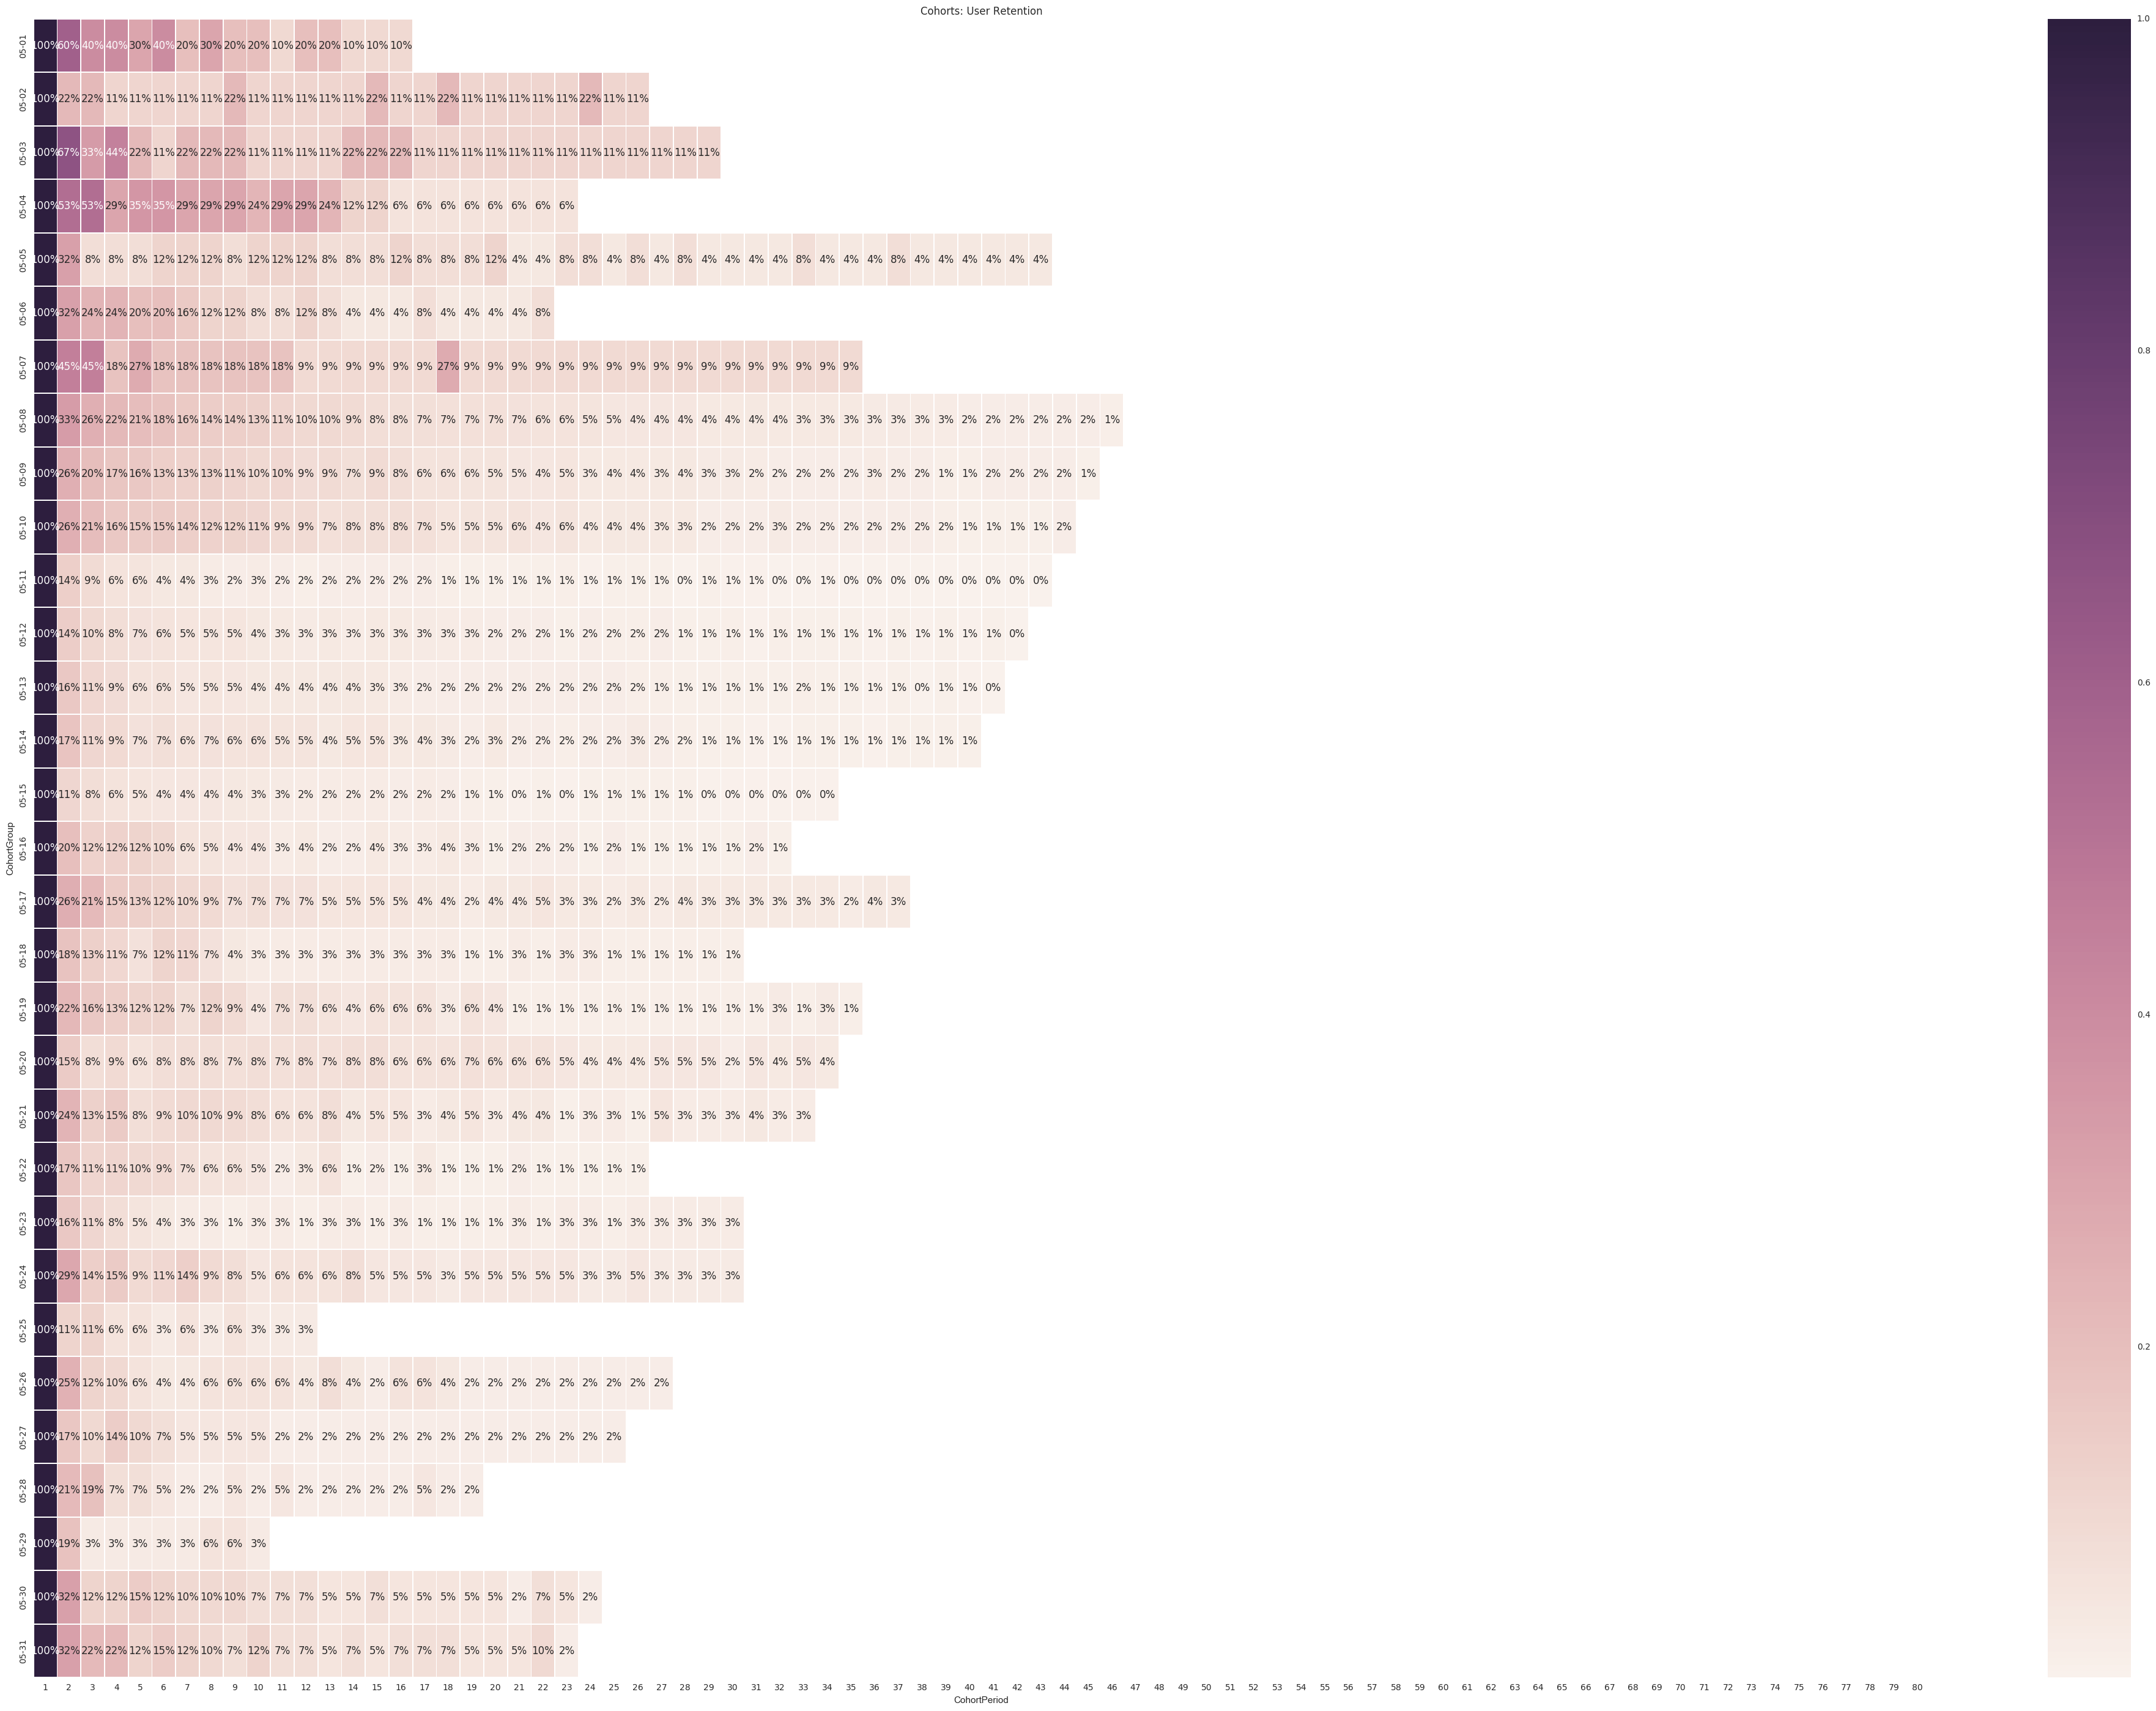

In [89]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(50, 35))
plt.title('Cohorts: User Retention')
plt.ylim(1, 31)
sns.heatmap(user_retention.iloc[:,55:86].T, mask=user_retention.iloc[:,55:86].T.isnull(), annot=True, fmt='.0%',linewidths=.5,xticklabels=True);

### Conclusion from May:
#### 1) Retention rate is almost 40% for 2nd day.
#### 2) 5%-10% Return Users are noticed even after 1 week of last visit.
#### 3) Retention is noticed between 10-45 days from the day of start.


.

# User Retention June 2015 is show below

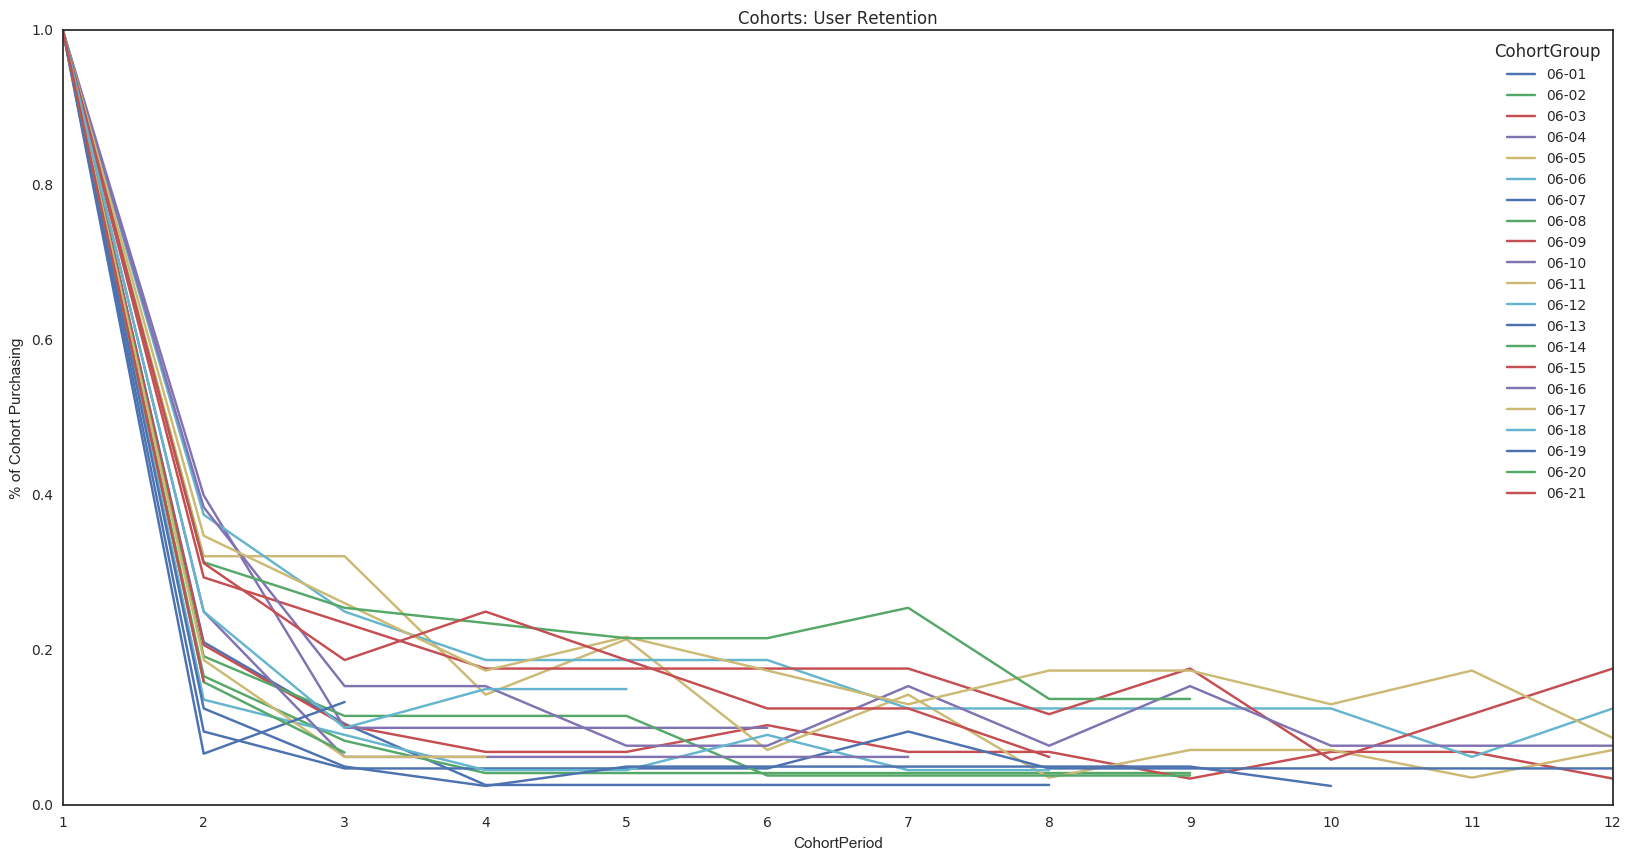

In [97]:
user_retention[list(user_retention.iloc[:,86:107])].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

## Observation :- 
### 70% User Leave in June on 2nd Day

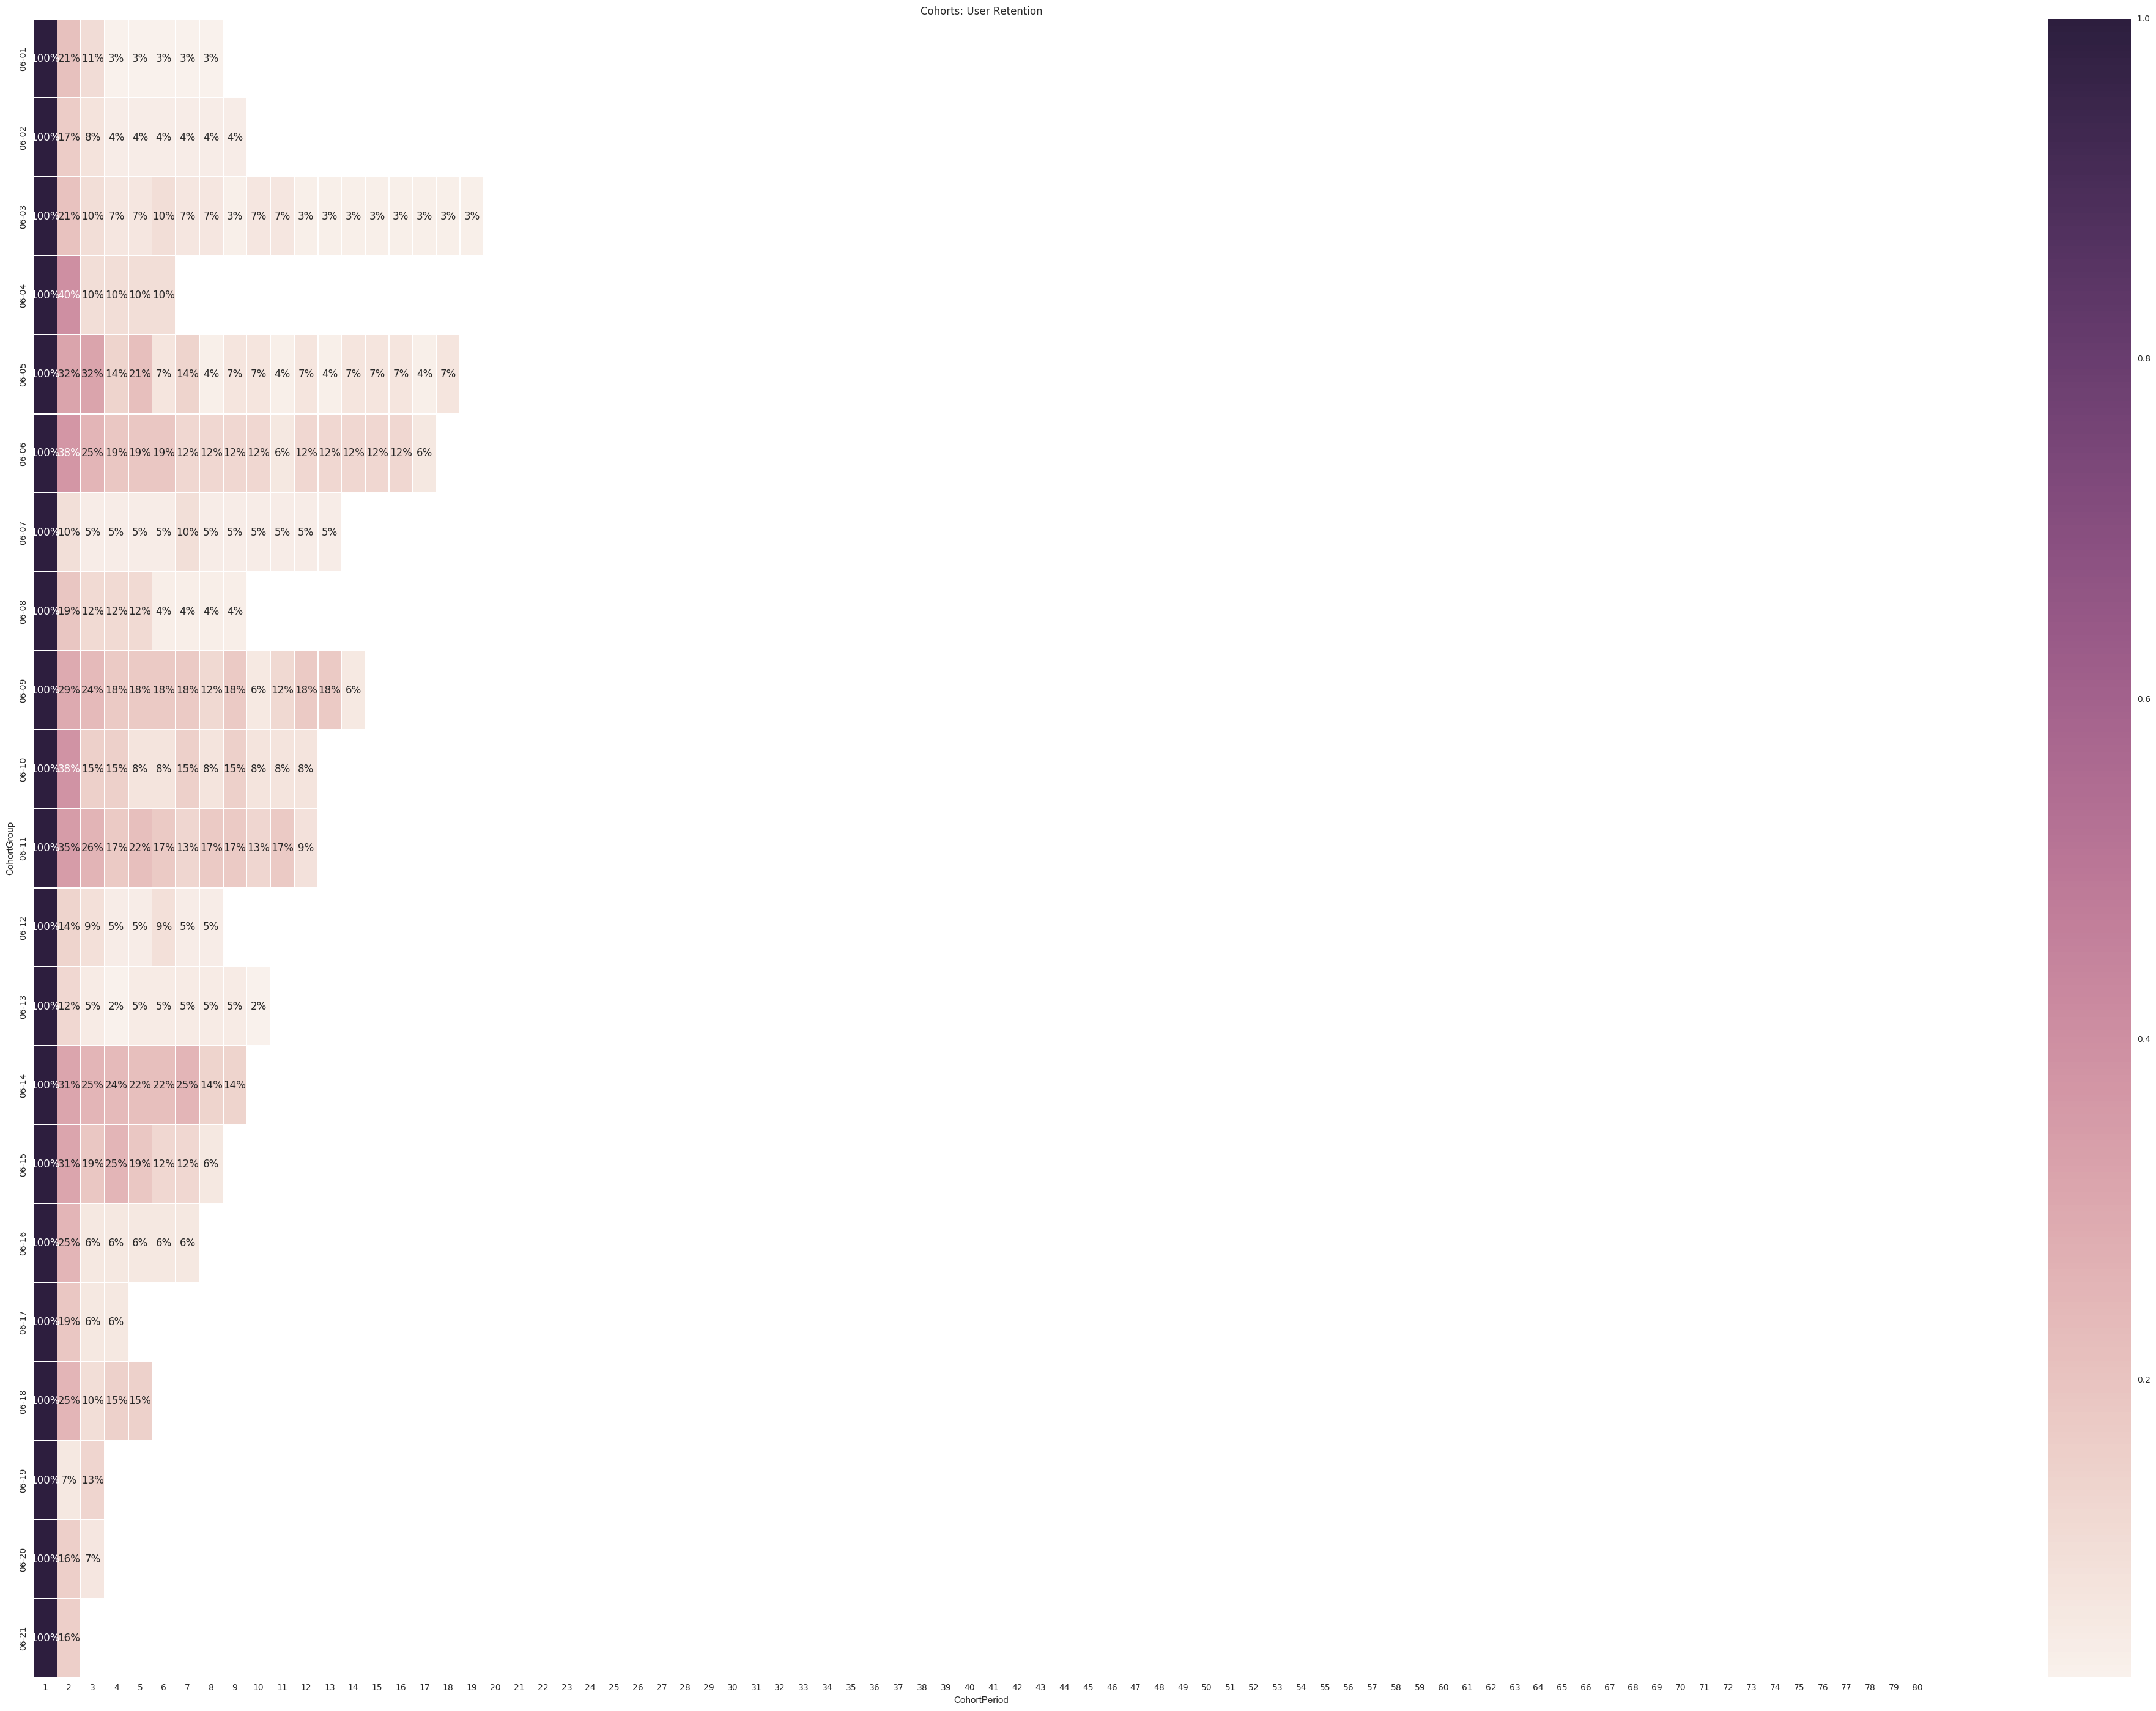

In [98]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(50, 35))
plt.title('Cohorts: User Retention')
plt.ylim(1, 31)
sns.heatmap(user_retention.iloc[:,86:107].T, mask=user_retention.iloc[:,86:107].T.isnull(), annot=True, fmt='.0%',linewidths=.5,xticklabels=True);

## Observation June:
### Users who join Mid June between 5th of June to 15th June have 20% Higher Chance of staying for as long as 12-19 Days

.

.

# Step 2:

Difference in retention rate between User_id and Device_id

Results can not be compared accurately <br />
1)as there are only 11685 Device_id VS 17916 User_id. <br />
2)as there are more than 112 missing Device id in the dataset<br />
This produces a drastic Bias in the result.



In [7]:
print "Total Number of Device Id present in the data = %s"%(len(set(df_user['register_mobile_uid'])))

Total Number of Device Id present in the data = 11685


In [8]:
print "Missing Device Id in the data = %s" %(df_user[df_user['register_mobile_uid'].isnull()].shape[0])

Missing Device Id in the data = 112


# Step 3:
How much of the variation in the 2nd day retention can be explained by whether or not the user completed the tutorial on the 1st day.<br />
**(You know if someone has complete the tutorial from the funnel steps in the user file. if funnel_1d greater than 2116 then user has completed the tutorial) **


What is the significance of funnel_1d in understanding 2nd day retention. 

In [7]:
# Funnel_1d greater than 2116
df_ses_funnel = df_ses[df_ses['funnel_1d']>=2116]

In [8]:
def cohort_period_funnel(df_ses_funnel):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd day for every user:
        df_ses.sort(['user_id', 'OrderTime', inplace=True)
        df_ses = df_ses.groupby('user_id').apply(cohort_period)
        df_ses[df_ses.CohortPeriod == 3]
    """
    df_ses_funnel['Cohort_period'] = np.arange(len(df_ses_funnel['datetime'])) + 1
    return df_ses_funnel

In [9]:
second_day = df_ses_funnel[['user_id','session_id','datetime','funnel_1d']].groupby(df_ses_funnel['user_id']).apply(cohort_period_funnel)

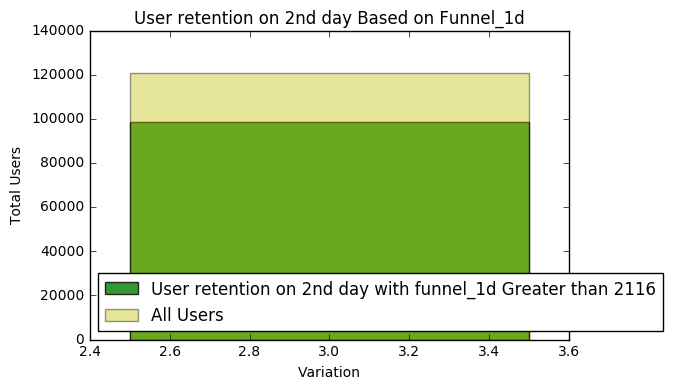

In [69]:
fig, ax = plt.subplots()
rects1 = plt.bar(2.5,second_day[second_day['Cohort_period']>=2].shape[0] , 1,
                 alpha=0.8,
                 color='g',
                 error_kw={'ecolor': '0.3'},
                 label='User retention on 2nd day with funnel_1d Greater than 2116')

rects2 = plt.bar(2.5,df_ses.shape[0] , 1,
                 alpha=0.4,
                 color='y',
                 error_kw={'ecolor': '0.3'},
                 label='All Users')

plt.xlabel('Variation')
plt.ylabel('Total Users')
plt.title('User retention on 2nd day Based on Funnel_1d')
plt.legend(loc=3)

plt.tight_layout()
plt.show()

In [30]:
print "User with funnel_1d greate than 2116 explains %d" %((second_day[second_day['Cohort_period']>=2].shape[0]*100//df_ses.shape[0]))+'% of variation in 2nd day retention of user'

User with funnel_1d greate than 2116 explains 81% of variation in 2nd day retention of user


# Step 4:

Identifying **two other significant variables** that we should look at to improve **day 2 retention** and quantify **how much of the variation** in retention can be **explained by these variables**.

# Result:

The retention depends highly on player game performances:

1) If the user is below 272 Xp and game_resources_stamina is less than 4.5<br />
**Player Has 83% Chances to leave the application.**

2) Otherwise player continues using the app on 2nd day.

<img src="img/tree_deviance.jpeg">

### The Tree Diagram below shows how many times a player will likely play again based on following stats

<img
src="img/cohort_period_reptetion_of_players.png">

# Lets Check The Final result to Step 4:
**Top Two** significant variables that we should look at to improve day 2 retention.

And how much of the variation in retention can be explained by these variables.

### Below we see relative influence All the factors in the data have on 2nd day retention including top 2.

<img
src="img/relative_importance.png">

We Notice funnel_5min has higher importance than Funnel_1d
Also Version, day of the month are very important

But the most significant or generalized Features are in the game itself:<br />
**1)Game_Resource_Xp has 75% Importance in determining 2nd day retention.<br />
2)User Stamina explains 20% of retention.**
